# Table of Contents:

    1. Introduction
    2. Apache Spark
        2.1 Data Science tasks
        2.2 Storage layers for Apache Spark
        2.3 Spark Context: Role
    3. Introduction to the problem
        3.1 PageRank
        3.2 PageRank Algorithm
        3.3 Understandimg dataset
    4. Programming with RDDs
        4.1 What are RDDs?
        4.2 Creating RDDs
        4.3 Opertions on RDDs
            4.3.1 Transformations
            4.3.2 Actions
        4.4 Quiz
    5. Project
        5.1 Introduction: Zipf's Law
        5.2 Visualization with NumPy
        5.3 Word Count from Project Gutenberg Free ebook Texts
        5.4 Tasks
        
    6. Apache Spark Architecture
        6.1 Why to learn underlying architecture
        6.2 Spark Runtime architecture
        6.3 The Driver
        6.4 The Executor
        6.5 Cluster manager
        6.6 Difference between Job and Tasks
        6.7 Summary
        6.8 QUIZ
        
    7. Spark SQL
        Part 1 - Dataframes
        
        7.1 Introduction: Dataframes
        7.2 Why Dataframes are useful?
        7.3 Create a Dataframe
        7.4 Introduction to Dataset
        7.5 Selecting Colums
        7.6 Operations on Coolumns
        7.7 User Defined functions
        7.8 Quiz
        
        Part 2: SQL Queries
        
        7.9 Register temproary table
        7.10 SQL Queries with Spark
        
        Project
        
    8. Power of MLlib:Apache Spark
        
        8.1 Machine Learning with Spark 
        8.2 Introduction to the problem 
        8.3 ML Pipelines 
        8.4 Tasks 
        8.5 Project

## Pick up the threads

In Big Data Architectures, after Data Ingestion and storage layer, there comes Data Processing layer. In the Data Processing Layer, we will discuss Aache Spark to process Big Data in a distributed and efficient manner.

# Introduction
With the rapid growth of emerging applications like social network, semantic web, sensor networks and LBS (Location Based Service) applications, a variety of data to be processed continues to witness a quick increase. Effective management and processing of large-scale data poses an interesting but critical challenge. Once you have Data collected at one layer, next step is to take it to proccessing layer.

In this concept we will learn ways to proccess big data in a distributed environment with parallel computation. Tools used in industry at this layer:

**Apache Spark:**  Spark is the open standard for flexible in-memory data processing that enables batch, real-time, and advanced analytics on the Apache Hadoop platform.

**Apache Flink:** Apache Flink is an open source streaming platform which provides you tremendous capabilities to run real-time data processing pipelines in a fault-tolerant way at a scale of millions of events per second. It has better support for stream processing and some significant improvements.

**Apache Spark vs Apache Flink**

- Flink and Spark are both general-purpose data processing platforms and top level projects of the Apache Software Foundation (ASF). While Spark is a batch oriented system that operates on chunks of data, called RDDs, Apache Flink is a stream processing system able to process row after row in real time.

**Apache Sqoop:** Apache Sqoop is a tool in Hadoop ecosystem which is designed to transfer data between HDFS (Hadoop storage) and relational database servers like mysql, Oracle RDB, SQLite, Teradata, Netezza, Postgres etc. Apache Sqoop imports data from relational databases to HDFS, and exports data from HDFS to relational databases. It efficiently transfers bulk data between Hadoop and external datastores such as enterprise data warehouses, relational databases, etc.

**Why Apache Sqoop?**

Now, as we know that Apache Flume is a data ingestion tool for unstructured sources, but organisations store their operational data in relational databases. So, there was a need of tool which can import and export data from relational databases. This is why Apache Sqoop was born. Sqoop can easily integrate with Hadoop and dump structured data from relational databases on HDFS, complimenting the power of Hadoop. This is why Apache Flume is an important part of Hadoop Ecosystem.

# Apache Spark
##  What is Apache Spark?

**Apache Spark is a cluster computing platform designed to be fast and general-purpose.**

- On the speed side, Spark extends the popular MapReduce model to efficiently support more types of computations, including interactive queries and stream processing.

- One of the main features Spark offers for speed is the ability to run computations in memory, but the system is also more efficient than MapReduce for complex applications running on disk.

- At its core, Spark is a **“computational engine”** that is responsible for scheduling, distributing, and monitoring applications consisting of many computational tasks across many worker machines, or a computing cluster.




<img src = "images/apache-spark-vs-hadoop-mapreduce.jpg">

## 2.1 Apache Spark: Data Science tasks

- Data scientists job includes experience with SQL, statistics, predictive modeling (machine learning), and programming, usually in Python, Matlab, or R. Data scientists also have experience with techniques necessary to transform data into formats that can be analyzed for insights (sometimes referred to as data wrangling)


- Spark’s speed and simple APIs can make their life bit easy, and its built-in libraries mean that many algorithms are available out of the box.

- The Spark shell makes it easy to do interactive data analysis using Python or Scala.

- Spark SQL also has a separate SQL shell that can be used to do data exploration using SQL, or Spark SQL can be used as part of a regular Spark program or in the Spark shell.

- Machine learning and data analysis is supported through the MLLib libraries or you can load your own models too.

- Spark provides a simple way to parallelize these applications across clusters, and hides the complexity of distributed systems programming, network communication, and fault tolerance

## 2.2 Storage layers for Spark

- Spark can create distributed datasets from any file stored in the Hadoop distributed filesystem (HDFS) or other storage systems supported by the Hadoop APIs. Some examples: **local filesystem, Amazon S3, Cassandra, Hive, HBase, etc.**

**Note:** Spark does not require Hadoop; it simply has support for storage systems implementing the Hadoop APIs.

## 2.3 SparkContext

Before starting on writing a spark application it's necessary to understand Spark context. Spark context sets up internal services and establishes a connection to a Spark execution environment. 

## Role of a Spark Context

**Spark Context is the entry point. Like a key to your car.**

- Tells Sparks how to access a cluster

- Allocates Executors

-  The context, living in your driver program, coordinates sets of processes on the cluster to run your application.

- The context keeps track of live executors by sending heartbeat messages periodically. 


- Third, the context may perform dynamic resource allocation if the cluster manager permits. This increases cluster utilization in shared environments by proper scheduling of multiple applications according to their resource demands.

**Example 1:**

In the sense, if you want to compute a complex aggregation on spark, you need to distribute the task in the cluster.

Spark context is the gateway to a Spark Cluster.

**Example 2:**

If you have a dataset ( simple CSV/TXT file) and want computations on this data, you want all the worker nodes to have access to this data. Use the spark context to broadcast this file to all the nodes.

- It allows your Spark Application to access Spark Cluster with the help of Resource Manager. The resource manager can be one of these three- Spark Standalone, YARN, Apache Mesos

<img src = "images/sc.jpeg">



If your have Spark running then instance of `SparkContext` will be available to you. 
Also, you can use `findspark` module to get running SparkContext into your console. Initiating `SparkContext` in that case would be as follows:

```python
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext()
```

> you may need to pass `spark_home` path to `init` method call

Example:

`findspark.init(spark_home='path_to_spark')`

Next, type `sc` to check if you have a SparkContext running: 

In [1]:
### Test to see if you have access to `sc` variable which is `SparkContext` instance
sc

<SparkContext master=local[*] appName=PySparkShell>


## 3 Introduction to the problem

### 3.1 PageRank

We live in a computer era. Internet is part of our everyday lives and information is only a click away. Just open your favorite search engine, like Google, AltaVista, Yahoo, type in the key words, and the search engine will display the pages relevant for your search. But how does a search engine really work?

The usefulness of a search engine depends on the relevance of the result set it gives back. There may of course be millions of web pages that include a particular word or phrase; however some of them will be more relevant, popular, or authoritative than others. A user does not have the ability or patience to scan through all pages that contain the given query words. One expects the relevant pages to be displayed within the top 20-30 pages returned by the search engine. Modern search engines employ methods of ranking the results to provide the "best" results first that are more elaborate than just plain text ranking.

So, our aim is to **Rank the webpages to provide best search results.**

For this, we will use Page Rank Algorithm. The idea that Page Rank introduce is that, the importance of any web page can be judged by looking at the pages that link to it. Let's take an example to understand the algorithm better:

<img src = "images/pagerank.jpg">


### 3.2 How the Algorithm Works?

The PageRank algorithm outputs a probability distribution that represents the likelihood that a person randomly clicking on web links will arrive at a particular web page. If we run the PageRank program with the input data file and indicate 20 iterations we shall get the following output: 

 ```
 url_4 has rank: 1.3705281840649928.
 url_2 has rank: 0.4613200524321036.
 url_3 has rank: 0.7323900229505396.
 url_1 has rank: 1.4357617405523626.
 ```
The results clearly indicates that URL_1 has the highest page rank followed by URL_4 and then URL_3 & last URL_2. The algorithm works in the following manner:

If a URL (page) is referenced the most by other URLs then its rank increases, because being referenced means that it is important which is the case of URL_1.
If an important URL like URL_1 references other URLs like URL_4 this will increase the destination’s ranking.



## 3.3 Introduction to the Dataset

Throughout the entire concept, we will be using MEDLINE records (abstracts in the life sciences domain). 
The links represent content-similarity links, i.e., pairs of abstracts that are similar in the words they contain. For example, consider pmid (unique identifier in the MEDLINE collection) [8709207](https://www.ncbi.nlm.nih.gov/pubmed/8709207). See the "Related Links" panel on the right hand side of the browser? The data provided above represent instances of graphs defined by such links.

The files are tab-delimited adjacency list representations of the link between these medical records and hence their webpages. The first token on each line represents the unique id of the source node, and the rest of the tokens represent the target nodes (i.e., outlinks from the source node). If a node does not have any outlinks, its corresponding line will contain only one token (the source node id).


### Let's get started

**Treat**: The function implementing the algorithm logic will be provided :) 

**Task**: Read the dataset into RDDs and implement a simpler version of PageRank in PySpark.

# 4 Programming with RDDs

## RDD: Resilient distributed dataset

## 4.1 What are RDDs?

-  RDDs stands for Resilient Distributed Dataset.

- RDD is the **core abstraction** in Apache Spark.
(In case you are thinking, What does abstraction mean in programming? then go through this excellent expalnation over stackoverflow - [Abstraction](https://stackoverflow.com/questions/21220155/what-does-abstraction-mean-in-programming)

- An RDD is simply a **immutable distributed collection of elements**. 

- The name captures two important properties:
    - **Resilient** means that we must be able to withstand failures and complete an ongoing computation.
    - **Distributed** means that we must account for multiple machines having a subset of data. Formally, RDD is a read-only, partitioned collection of records

- In Spark all work is expressed as either creating new RDDs, transforming existing RDDs, or calling operations on RDDs to compute a result.

- The data inside a spark application is read into the form of RDDs and then Spark automatically distributes the data contained in RDDs across your cluster and parallelizes the operations you perform on them.

- RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.

## 4.2 Creating RDDs

Spark provides two ways to create RDDs:

- Parallelizing a collection in your driver program.
- Loading an external dataset

### 4.2.1 Parallelizing a collection in your driver program:

Create RDDs using parallelize() method on existing iterable or collection in your driver program:



In [2]:
import re
import sys
from operator import add

from pyspark.sql import SparkSession

wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']

#### splitting into 4 slices
wordsRDD = sc.parallelize(wordsList, 4)

#### Print out the type of wordsRDD
print(type(wordsRDD))

#### Print number of partitions in your RDD
num_partitions = wordsRDD.getNumPartitions()
print("Number of partitions in your RDD is  %s" % (num_partitions))

<class 'pyspark.rdd.RDD'>
Number of partitions in your RDD is  4


## Collecting parallelized data at one place

Next, look into an RDD to check if our data is embedded correctly into it. For this, call `collect()` method on a RDD which will bring data from all the partitions at one place.

In [3]:
wordsRDD.collect()

['cat', 'elephant', 'rat', 'rat', 'cat']

Sometimes the data which is loaded in a RDD is very large and calling a collect operation on such RDD can be an expensive operation in terms of Memory. In those cases, we can call `take()` method to display a part of our RDD and not whole data. Let's call `take` on wordsRDD":

In [4]:
wordsRDD.take(2)
wordsRDD.take(3)

['cat', 'elephant', 'rat']

### Task
**Create your first RDD**

In this task you will create a RDD containing the numbers in range(1,50) into 20 Partitions

1. Generate a list `numbers_set` containing numbers in range(1,50)

2. Parallelize the list using SparkContext into 20 partitions to create a RDD `numbers_rdd`.

3. Print out number of partitions in the RDD

3. Print out the first 2 elements in your RDD 

4. Print out the whole RDD

## Solution:

In [5]:
#Generate a list `numbers_set` containing numbers in range(1,50)
numbers_set = range(1,50)

#Parallelize the list using SparkContext into 20 partitions to create a RDD `numbers_rdd`.
numbers_rdd = sc.parallelize(numbers_set, 20)

#Print out number of partitions in the RDD
numbers_rdd.getNumPartitions()

#Print out the first 2 elements in your RDD 
numbers_rdd.take(2)

# Print out the whole RDD
numbers_rdd.collect()


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

### 4.2.2 Loading an external dataset
**Create a Text RDD**
Text file RDDs can be created using SparkContext’s textFile method. This method takes an URI for the file (either a local path on the machine, or a hdfs://, s3n://, etc URI) and reads it as a collection of lines. Here is an example invocation:
**Two methods:**

- `sc.textFile("file_path")`: Creates a RDD with each line as an element. 
- `sc.wholeTextFiles("file_path")` :  Creates a PairRDD with the key being the file name with a path.


**`sc.textFile()` vs `sc.wholeTextFiles()`:**

SparkContext.wholeTextFiles lets you read a directory containing multiple small text files, and returns each of them as (filename, content) pairs. This is in contrast with textFile, which would return one record per line in each file. It essentialy means that `sc.textFile()` doesn't give back filenames in the RDD.

**Let's load an external dataset into a RDD:**

We'll load data from a directory containing multiple txt files into one RDD.


**TASK 1** 

INSTRUCTIONS:

1. Load the data residing in a directory by `sc.wholeTextFiles(<directory_path/filepath>")` into a RDD `med_rdd`. Here, filename is `medline_pager.txt`

2. Print out first three elements of the RDD `med_rdd` using `take()` method on the RDD.

3. Print out the number of Partitions created

4. Perform 1-3 steps using `sc.textFiles()` to read `medline_pager.txt`.

NOTE: Note that sc.textFile() doesn't give RDD with filenames while `sc.wholeTextFiles` returned a paired RDD with key as filenames.



**SOLUTION:**

In [7]:
# 1. Load using sc.textFile()

med_rdd = sc.wholeTextFiles("data/medline_pager.txt")

# 2. Print out first three elements

med_rdd.take(3)

# 3. Print number of partitions

med_rdd.getNumPartitions()

# 4. Load using sc.wholeTextFiles()

med_rdd = sc.textFile("data/medline_pager.txt")

# 5. Print out first three elements

med_rdd.take(3)

# 6. Print number of partitions

med_rdd.getNumPartitions()

2

**NOTE:** For futher operations, we will use RDD returned by `sc.textFile()` by reading a sample dataset `sample_pager.txt` for tutorial reference purpose. Learners are requested to perform all the taska using dataset `medline_pager.txt`.


In [10]:
url_rdd = sc.textFile('data/sample_pager.txt')

## 4.3 Operations on RDDs

From the Spark Programming Guide:

>RDDs support two types of operations: **transformations**, which create a new dataset from an existing one, and **actions**, which return a value to the driver program after running a computation on the dataset.

### 4.3.1 Transformation on RDDs

- Transformations are kind of operations which will transform your RDD data from one form to another. And when you apply this operation on any RDD, you will get a new RDD with transformed data

- Operations like map, filter, flatMap are transformations.

- **Note:** when you apply the transformation on any RDD it will not perform the operation immediately. It will create a DAG(Directed Acyclic Graph) using the applied operation, source RDD and function used for transformation. And it will keep on building this graph using the references till you apply any action operation on the last lined up RDD. That is why the transformation in Spark are lazy.


### 4.3.2 Actions on RDDs
- This kind of operation will also give you another RDD but this operation will trigger all the lined up transformation on the base RDD (or in the DAG) and than execute the action operation on the last RDD. 
- Operations like collect, take, count, first, saveAsTextFile are actions


Let's have a look to data in your RDD currently looks like. We will use `take()` method for this:

**`take(n)`**:

The action take(n) returns n number of elements from RDD. 

So this RDD contains on each line, first element as page name and rest list of all neighbors and everything tab seperated.

**Generate a web system as an RDD as page name, neighbor page name from the current RDD (page name, list of all neighbors).**

- For this, we have to call transformations on our current RDD. First let's create a simple list out of each line removing tabs.

**`map():`**
The map() transformation takes in a function and applies it to each element in the RDD with the result of the function being the new value of each element in the resulting RDD.


**`filter():`**
The filter() transformation takes in a function and returns an RDD that only has elements that pass the filter() function.

In [11]:
url_rdd = url_rdd.map(lambda line: line.split('\t'))
url_rdd.take(4)

[[u'url_1', u'url_4'],
 [u'url_2', u'url_1'],
 [u'url_3', u'url_2', u'url_1'],
 [u'url_4', u'url_3', u'url_1']]

**Task 2**

- Apply map() transformation on RDD created by reading medline_pager.txt dataset. This transformation should result in a RDD `med_rdd` where each web group link is a list. Use map to split each webgrouplink by tab.

- Print out the first ten elements of your rdd.

**Hint:** 

- Like shown in example use map(lambda line:line.split('\t')) on the RDD
- Use `take(n)` to print first n elements of the RDD. 

Next, let's call a customize function to get the RDD in the required format. Note here we want to produce multiple output elements for each input element. The operation to do this is called **flatMap()**.

**flatMap():** Similar to map, it returns a new RDD by applying a function to each element of the RDD, but output is flattened.

TASK 2. Similarly use flatMap on the transformed RDD to ungroup the pagelinks where each line contains a list [main_page, neighbor_page] into a resultant RDD `url_links_rdd`.
Use the readymade function `ungroup_weblinks()` to ungroup each pagelinks list.

Hint: Use flatMap like this to apply `ungroup_weblinks` : 
`url_links_rdd = url_rdd.flatMap(lambda line: ungroup_weblinks(line))`

In [12]:
def ungroup_weblinks(each_pager):
    '''
    This function takes up a list of page links in the form [main_page neighbor1 neighbor2 .. neighbor n] and
    returns a `list of lists` with ungroup pagelinks lists like 
    [main_page neighbor1], [main_page, neighbor2],.., [main_page, neighbor n].
    
    Parameters
    ----------
    each_pager: list
    A list of pagelinks
    
    Returns
    -------
    final_list: list
    List of lists containing ungroup page links.
    '''

    page_main = each_pager[0]
    final_list = []
    for i in range(len(each_pager)-1):
        final_list.append([page_main, each_pager[i+1]])
    return final_list


url_links_rdd = url_rdd.flatMap(lambda line: ungroup_weblinks(line))

url_links_rdd.collect()

[[u'url_1', u'url_4'],
 [u'url_2', u'url_1'],
 [u'url_3', u'url_2'],
 [u'url_3', u'url_1'],
 [u'url_4', u'url_3'],
 [u'url_4', u'url_1']]

As, you'll see the ouput is flattened as expected.

Do the same operation on `med_rdd`.

**Our workflow to solve this problem will be like as shown below:**


<img src = "images/pgalgo.jpg">

**Let's start with creating the links RDD**

### Part 1: Create url link Paired RDD

#### PairedRDDs: Working with Key/Value pairs


**Paired RDD**: Pair RDD is just a way of referring to an RDD containing key/value pairs, i.e. tuples of data.

- Pair RDDs are a useful building block in many programs, as they expose operations that allow you to act on each key in parallel or regroup data across the network. For example, pair RDDs have a reduceByKey() method that can aggregate data separately for each key, and a join() method that can merge two RDDs together by grouping elements with the same key. 

- We will create a paired RDD from our existing RDD in the next steps

**Now, Generate the websystem as an RDD of tuples (page, list of neighbors) from the `url_links_rdd` i.e create a PairedRDD**

Spark provides us with a direct method to group the elements in a RDD by using `groupByKey()/reduceByKey()` method.

**groupByKey()**:  We can apply the “groupByKey” / “reduceByKey” transformations on (key,val) pair RDD. The “groupByKey” will group the values for each key in the original RDD. It will create a new pair, where the original key corresponds to this collected group of values.



In [13]:
def parseNeighbors(urls):
    """Parses a urls pair string into urls pair."""
    return urls[0], urls[1]


url_links_rdd = url_links_rdd.map(lambda urls: parseNeighbors(urls)).distinct().groupByKey().cache()
# pg.map(lambda urls: parseNeighbors(urls)).distinct().groupByKey().mapValues(list).collect()

**Let's check if we got the expected RDD!**

In [14]:
# url_links_rdd now contains tuples (page, list of neighbors)
url_links_rdd.mapValues(list).collect()


[(u'url_3', [u'url_1', u'url_2']),
 (u'url_1', [u'url_4']),
 (u'url_4', [u'url_3', u'url_1']),
 (u'url_2', [u'url_1'])]

**Task**

Using the steps shown, Generate the websystem as an RDD of tuples (page, list of neighbors) from the url_links_rdd i.e create a PairedRDD.

We used `cache()` method above. **Can you tell why?**

Hint - Links RDD will be called multiple times in our solution

Answer - When you run a spark transformation via an action (count, print, foreach), then, and only then is your graph being materialized and in your case the file is being consumed. RDD.cache purpose it to make sure that the result of sc.textFile("data.txt") is available in memory and isn't needed to be read over again. In our case we want transformed url link rdd to cached.

When you persist an RDD, each node stores any partitions of it that it computes in memory and reuses them in other actions on that dataset (or datasets derived from it). This allows future actions to be much faster (often by more than 10x). Caching is a key tool for iterative algorithms and fast interactive use.

**Transformations are again grouped into two types:**

- **Narrow transformation:** RDD operations like map, union, filter can operate on a single partition and map the data of that partition to resulting single partition. These kind of operations which maps data from one to one partition are referred as Narrow operations. Narrow operations doesn’t required to distribute the data across the partitions.


- **Wide transformation** -RDD operations like groupByKey, distinct, join may require to map the data across the partitions in new RDD. These kind of operations which maps data from one to many partitions are referred as Wide operations. Narrow operations doesn’t required to distribute the data across the partitions. In most of the cases Wide operations distribute the data across the partitions. These considered to be more costly than narrow operations due to data shuffling.

<img src= "images/transformations.jpg">

**Note: Wide transformations results in stages**


Data materialization occurs in a few places. When reading, shuffling, or passing data to an action. This is where the distinction between **narrow and wide dependencies** comes up. 
Narrow dependencies allow pipelining, a state of flow is straightforward. While wide dependencies forbid pipelining by requiring a shuffle. 

### Part 2: Populating the Ranks Data - Initial Seeds

The code below creates "ranks0" - a key/value pair RDD by taking the key (URL) from the links RDD and assigning the value = 1.0 to it. Ranks0 is the initial ranks RDD and it is populated with the seed number 1.0 (please see diagram below). In the 3rd part of the program we shall see how this ranks RDD is recalculated at each iteration and eventually converges, after 20 iterations, into the PageRank probability scores mentioned previously.

In [15]:
ranks = url_links_rdd.map(lambda url_neighbors: (url_neighbors[0], 1.0))

In [16]:
ranks.take(2)

[(u'url_3', 1.0), (u'url_1', 1.0)]

### Part 3: Looping and Calculating Contributions & Recalculating Ranks


This part is the heart of the PageRank algorithm. In each iteration, the contributions are calculated and the ranks are recalculated based on those contributions. The algorithm has 4 steps: 

1- Start the algorithm with each page at rank 1 

2- Calculate URL contribution: contrib = rank/size 

3- Set each URL new rank = 0.15 + 0.85 x contrib 

4- Iterate to step 2 with the new rank

In [17]:
def computeContribs(urls, rank):
    """Calculates URL contributions to the rank of other URLs."""
    num_urls = len(urls)
    for url in urls:
        yield (url, rank / num_urls)


In [18]:
url_links_rdd.join(ranks).collect()

[(u'url_3', (<pyspark.resultiterable.ResultIterable at 0x7ff111bccb10>, 1.0)),
 (u'url_2', (<pyspark.resultiterable.ResultIterable at 0x7ff111b7b550>, 1.0)),
 (u'url_1', (<pyspark.resultiterable.ResultIterable at 0x7ff111b7b410>, 1.0)),
 (u'url_4', (<pyspark.resultiterable.ResultIterable at 0x7ff111b7bd10>, 1.0))]

In [19]:
from operator import add
no_of_iteration = 20
for iteration in range(no_of_iteration):
    # Calculates URL contributions to the rank of other URLs.
    contribs = url_links_rdd.join(ranks).flatMap(
        lambda url_urls_rank: computeContribs(url_urls_rank[1][0], url_urls_rank[1][1]))
    ranks = contribs.reduceByKey(add).mapValues(lambda rank: rank * 0.85 + 0.15)

In [20]:
for (link, rank) in ranks.collect():
    print("%s has rank: %s." % (link, rank))
    
#The higher the rank, more relevant is the page.

url_4 has rank: 1.37052818406.
url_3 has rank: 0.732390022951.
url_2 has rank: 0.461320052432.
url_1 has rank: 1.43576174055.


In [21]:
data = ranks.collect()
import matplotlib.pyplot as plt
x, y = zip(*data)
plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

## Concluding the operations we performed:

<img src = "images/pagerank_conclusion.jpg">

## 4.4 QUIZ

**Choose the correct answer from the given options for each question**

**Q.1 How can I modify in-place every item of the dataset?**

A. By invoking a 'flatMap' transformation

B. By invoking a 'map' transformation

C. You cannot modify data in-place in Spark 


Answer: **C**
Reason: True. Datasets are immutable in Spark, and you cannot modify data in-place.

**Q.2 What is a keyed RDD?** 

A. An RDD with a key.

B. An RDD of key-value pairs. 

C. An RDD that you can use as a key in associative data structures.


Answer: **B**


# 5. Project

## 5.1 Introduction: Zipf's Law

Named after the American linguist George Kingsley Zipf (1902-1950), Zipf's Law describes an empirical law that describes the phenomenon in the physical and social sciences where many types of data can be approximated by Zipf distribution - a family of discrete power law probability distributions.

In linguistics, Zipf's law states that given some text of natural language, the frequency of any word is inversely proportional to its rank in the frequency table.  The most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. 

**For example**,
In one sample of words in the English language, the most frequently occurring word, **"the"**, accounts for nearly 7% of all the words (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word **"of"** accounts for slightly over 3.5% of words (36,411 occurrences), followed by **"and"** (28,852). 

#### Formula:

Zipf's law then predicts that frequency of element of rank $k$ can be approximated by,

$$f(k; s, N) = \frac{1/k^s}{\sum_{n=1}^N (1/n^s)}$$

where $N$ is the number of elements, and $s$ is the value of the exponent characterizing the distribution.  Normally, $s$ is defined to be $1$.

To see illustration of Wordcount example visit: http://www.wordcount.org/main.php

## 5.2 Visualization with NumPy

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import findspark
findspark.init()
from pyspark import SparkContext

In [23]:
f = lambda rank,elements,s: 1/(np.sum(1./(np.arange(1,elements+1)**s)) * rank**s)

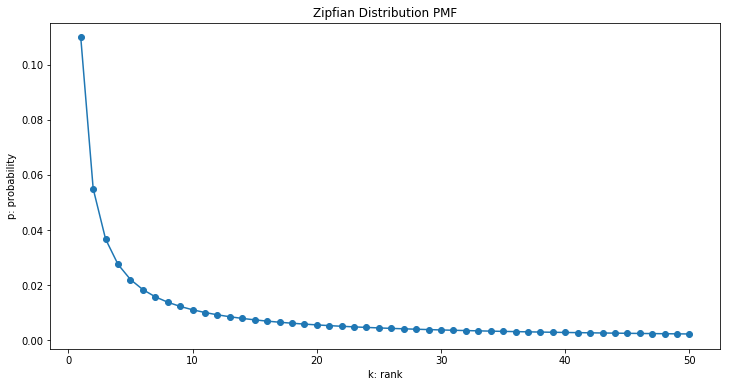

In [24]:
ranks = np.arange(1,51)
N = 5000
s = 1.0

plt.figure(figsize=(12,6))
plt.plot(ranks,f(ranks,N,s), 'o-')
plt.title("Zipfian Distribution PMF")
plt.xlabel("k: rank")
plt.ylabel("p: probability")
plt.show()

## 5.3  Word Count from Project Gutenberg Free ebook Texts

This exercise will attempt to replicate the results from wordcount.org by processing a large volume of sample texts.  We'll use Spark to read the text data, process the texts, and examine the total number of unique words.  

We will sample 16 texts from [Project Gutenberg](https://www.gutenberg.org/ "Title").
Sample text files are in the folder 'books'

Load Text Files
Next, we'll load up the text files and create a text file RDD. Spark provides textFile method to read a text file and return it as a RDD.


## 5.4 TASKS: 
**TASK 1.** Read the text files residing into a folder `books` into one single RDD `textsRDD`.
Hint: Use `sc.textFile("folder_path")`

In [25]:
books_path = os.path.join('books')
textsRDD = sc.textFile(books_path + '/*.txt')

**TASK 2.** Clean the data in RDD, by removing all non-alpanumeric characters.
Use the readymade `parsewords()` function for cleaning the data.

**Hint:** Use `map()` or `flatMap()` on the `textsRDD` to apply `parsewords()`

In [26]:
# function to clean up the words
import re

def parsewords(sentence):
    # Convert all non-alphanumeric characters into empty string
    sentence_clean = re.sub(r'([^A-Za-z0-9\s+])', '', sentence)  
    words = sentence_clean.split(' ')
    # Convert to lowercase and eliminate empty string words
    return [word.lower() for word in words if word != ''] 

We have a a RDD that is a collection of strings. We'll start by mapping the function parsewords to each of the line of strings in textsRDD.

In [27]:
textsRDD.map(parsewords).take(5)  # Not quite what we want!

[[u'project',
  u'gutenbergs',
  u'frankenstein',
  u'by',
  u'mary',
  u'wollstonecraft',
  u'godwin',
  u'shelley'],
 [],
 [u'this',
  u'ebook',
  u'is',
  u'for',
  u'the',
  u'use',
  u'of',
  u'anyone',
  u'anywhere',
  u'at',
  u'no',
  u'cost',
  u'and',
  u'with'],
 [u'almost',
  u'no',
  u'restrictions',
  u'whatsoever',
  u'you',
  u'may',
  u'copy',
  u'it',
  u'give',
  u'it',
  u'away',
  u'or'],
 [u'reuse',
  u'it',
  u'under',
  u'the',
  u'terms',
  u'of',
  u'the',
  u'project',
  u'gutenberg',
  u'license',
  u'included']]

If you've used `map()` then the output will be a list of list and this is not something which we want. We want to generate one single list containing all the words.

Unfortunately, the result of mapping parsewords to textsRDD did not yield the result that we want.

RDD has flatMap method that will map a function that has been passed in as a parameter to elements of the RDD and flatten the result. We'll use flatMap method and apply parsewords function to create a new RDD of words.

**TASK 3.** Apply `flatMap` using `parsewords()` to the `textRDD`.

In [28]:
wordRDD = textsRDD.flatMap(parsewords)
wordRDD.take(20)

[u'project',
 u'gutenbergs',
 u'frankenstein',
 u'by',
 u'mary',
 u'wollstonecraft',
 u'godwin',
 u'shelley',
 u'this',
 u'ebook',
 u'is',
 u'for',
 u'the',
 u'use',
 u'of',
 u'anyone',
 u'anywhere',
 u'at',
 u'no',
 u'cost']

We will use `map` method of the RDD to convert each occurance of word into a (key,value) pair and create a new RDD called `wordPairRDD`.  If you saw the word count example in MapReduce, you should be familiar with this pattern. 

Now that we have an RDD of words, let's examine how many words are in our sample texts.

**TASK 4.** Find total number of words in the `textRDD`

In [29]:
# Total Number of Words in our Sample
total_count = wordRDD.count()
print("Total Word Count:", total_count)

('Total Word Count:', 2018318)


**TASK 5:** Find frequency of each word and give out a RDD in form (word,frequency)

Hint:
1. Create a PairedRDD `wordPairRDD` out of `textRDD` which contains each individual word into a pair of (word,1) tuple .
2. Call `reduceByKey()` on `wordPairRDD` to obtain frequency count of each word in a resultant RDD `wordCountRDD`. This will also result in a RDD containing only unique words.

In [30]:
wordPairRDD = wordRDD.map(lambda word: (word,1))
wordPairRDD.take(20)

[(u'project', 1),
 (u'gutenbergs', 1),
 (u'frankenstein', 1),
 (u'by', 1),
 (u'mary', 1),
 (u'wollstonecraft', 1),
 (u'godwin', 1),
 (u'shelley', 1),
 (u'this', 1),
 (u'ebook', 1),
 (u'is', 1),
 (u'for', 1),
 (u'the', 1),
 (u'use', 1),
 (u'of', 1),
 (u'anyone', 1),
 (u'anywhere', 1),
 (u'at', 1),
 (u'no', 1),
 (u'cost', 1)]

We have converted wordRDD into a a new RDD that holds each instance of word into a (key,value) pair.  Let's use reduceByKey method to sum up the counts and create a new RDD, `wordCountRDD`. 

In [31]:
wordCountRDD = wordPairRDD.reduceByKey(lambda x,y: x+y)
wordCountRDD.take(20)

[(u'aided', 11),
 (u'voluble', 3),
 (u'promenade', 1),
 (u'disgracewhen', 1),
 (u'fawn', 3),
 (u'ridden', 2),
 (u'nun', 5),
 (u'applyed', 11),
 (u'joshua', 30),
 (u'needlessly', 4),
 (u'four', 392),
 (u'individualhe', 1),
 (u'verses', 43),
 (u'wormlike', 1),
 (u'120', 8),
 (u'expressiondown', 1),
 (u'callianira', 1),
 (u'relationships', 2),
 (u'increase', 46),
 (u'scufflings', 1)]

**TASK 5:** Calculate total number of Unique words in the dataset

Hint: After calling `reduceByKey()`, the resultant RDD conatins only set of unique words so simply call `count()` on `wordcountRDD()`

In [32]:
# Number of Unique Words
unique_count = wordCountRDD.count()
print("Total Unique Words:", unique_count)

('Total Unique Words:', 56238)


**TASK 6:** Print out the top 50 most occuring words in the dataset i.e. the top 50 words having highest frequency.

**Hint:**

Since wordCountRDD contains unique words and their counts, we sort them by takeOrdered method of RDD specifying the the ordering function to order by the values in (key,value) pairs. We will only select top 50 words.


In [33]:
# Select Top 50 words in descending order of frequency
top50Words = wordCountRDD.takeOrdered(50, key=lambda x: -x[1]) # Use '-' to sort in descending order
top50Words

[(u'the', 112921),
 (u'and', 70565),
 (u'of', 60234),
 (u'to', 55424),
 (u'a', 39794),
 (u'i', 33960),
 (u'in', 33750),
 (u'that', 27203),
 (u'it', 25073),
 (u'was', 22650),
 (u'he', 22172),
 (u'his', 20604),
 (u'with', 17034),
 (u'as', 16683),
 (u'is', 15833),
 (u'for', 15827),
 (u'you', 15700),
 (u'but', 14447),
 (u'not', 14256),
 (u'be', 13380),
 (u'had', 13236),
 (u'her', 12093),
 (u'at', 11588),
 (u'my', 11345),
 (u'on', 11230),
 (u'by', 10891),
 (u'all', 10465),
 (u'have', 9821),
 (u'him', 9803),
 (u'she', 9718),
 (u'me', 9365),
 (u'so', 9334),
 (u'this', 9273),
 (u'from', 8804),
 (u'or', 8600),
 (u'they', 8569),
 (u'which', 8557),
 (u'no', 7026),
 (u'there', 7007),
 (u'we', 6759),
 (u'were', 6698),
 (u'said', 6646),
 (u'when', 6451),
 (u'if', 6177),
 (u'one', 6137),
 (u'their', 6088),
 (u'are', 5984),
 (u'them', 5749),
 (u'what', 5687),
 (u'would', 5246)]

## Chaining

Although we have performed each transformation in separate steps, Spark enables us to perform these four steps in one line of code by chaining them together.

Although Python is strict about indentation, we use a convenient trick of wrapping a chain of RDD methods inside a parenthesis. This trick enables us to chain multiple RDD methods in several lines of code, which enhances readability of your code.


In [34]:
top50Words = (textsRDD.flatMap(parsewords)
                      .map(lambda word: (word,1))
                      .reduceByKey(lambda x,y: x+y)
                      .takeOrdered(50, key=lambda x: -x[1]))

**Let's plot the top50Words rank-frequency count.**

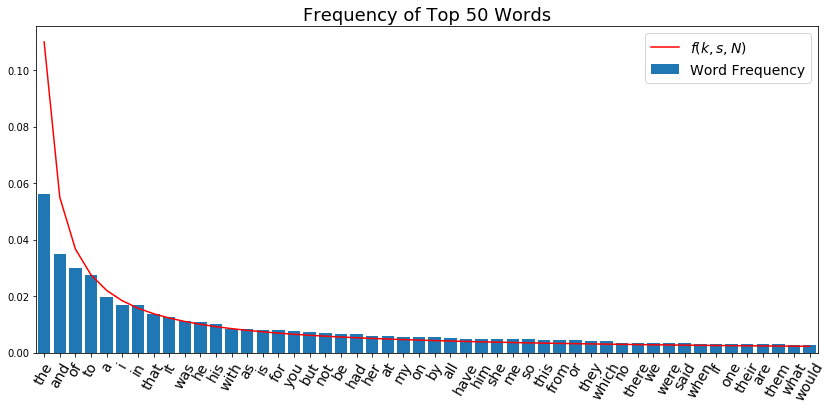

In [35]:
words = list()
counts = list()
for pair in top50Words:
    words.append(pair[0])
    counts.append(pair[1])

plt.figure(figsize=(14,6))
plt.bar(range(1,51), np.array(counts) / float(total_count), label="Word Frequency", align='center')
plt.plot(ranks, f(ranks,N,s), c='r', label="$f(k,s,N)$")
plt.xticks(range(1,51), words[:50], rotation=60, fontsize=14)
plt.title("Frequency of Top 50 Words",fontsize=18)
plt.legend(fontsize=14)
plt.xlim(0.5,50.5)
plt.show()

Although not exact, the word frequency from our sample of texts follows the Zipf distribution closely. We also see that in our sample texts, "and" is the second most frequently occuring word. This is in contrast to the word frequency ordering of BNC in which "of" is ranked second and "and" is ranked third.

# 6. Spark Runtime Architecture

## 6.1 Why to learn underlying architecture?


- In previously covered concepts we saw how to run spark application in a standalone mode. When it comes to processing Big Data, the Spark application must be written in a way to optimize the resources allocated to the cluster. The architecture understanding will help in visualizing the parallel processing that occurs inside a spark application.

- Having a complete picture is important for you when debugging the application or searching for a documentation. 

- A delightful treat for all the developers is that writing applications for parallel cluster execution use the same API that on a standalone mode. Means, you can use same `pyspark` script on a standalone mode and cluster mode.


## 6.2 Spark Runtime Architecture


- Spark can run on a wide variety of cluster managers (Hadoop YARN, Apache Mesos, and Spark’s own built-in Standalone cluster manager) in both on-premise and cloud deployments.

- Spark uses a **Master-Slave architecture** in its cluster mode.

<img src="images/masterSlave.jpeg">


- Single Master and multiple Slaves.

- A Spark application is launched on a set of machines using an external service called a **cluster manager**.

- A distributed application is placed in execution by a master using a Central coordinator called **Driver**.

- Tasks are the smallest unit of work in Spark. One Spark job is divided into multiple tasks.

- Executors on worker nodes are responsible for executing these tasks.

<img src = "images/sparkapp.jpg">

Let's get into more details one by one:

## 6.3 The Driver
    - Runs the main () function of the application and is the place where the Spark Context is created.

    - It has two main duties:

        - **Converts User Application into tasks**

            - Translates the RDD’s into the execution graph and splits the graph into multiple stages
            - A Spark program implicitly creates a logical directed acyclic graph (DAG) of operations. When the driver runs, it converts this logical graph into a physical execution plan.
        - **Scheduling tasks on executors**
            - Given a physical execution plan, a Spark driver must coordinate the scheduling of individual tasks on executors.
            - When executors are started they register themselves with the driver, so it has a complete view of the application’s executors at all times.
        - **Exposes the information about the running spark application through a Web UI at port 4040**
  
                        

**How important is it to have a smart driver?**

<img src = "images/driver.jpg">

The above picture explains enough! :)

## 6.4. Executors
    - Spark executors are worker processes responsible for running the individual tasks in a given Spark job
    - Executors are launched once at the beginning of a Spark application and typically run for the entire lifetime of an application, though Spark applications can continue if executors fail. 
    - Executors have two roles. First, they run the tasks that make up the application and return results to the driver. 
    - Second, they provide in-memory storage for RDDs that are cached by user programs, through a service called the Block Manager that lives within each executor. 

## 6.5. Cluster Manager

    - Spark depends on a cluster manager to launch executors and, in certain cases, to launch the driver.
    - The cluster manager is a pluggable component in Spark. This allows Spark to run on top of different external managers, such as YARN and Mesos, as well as its built-in Stand‐alone cluster manager.

**How these all are chained together?**

- Whenever you invoke an action, the job gets spawned in the driver program. 
- Then the driver runs a job scheduler to divide the job into smaller stages. 
- tasks are created for every job stage. 
- Finally, tasks are delegated to the executors, which perform the actual work. 
- All this machinery exists within the SparkContext object. 
- **It keeps track of the executors, it spawns jobs, and it runs the scheduler. **

## 6.6 What is the difference between job stages and tasks?.

- job stages are defined on RDD level. That is, they are not immediately executable. 
- Tasks, on the other hand, are bound to a particular partitions and thus are immediately executable.
- The idea behind the job stages is to pipeline computation as much as possible, avoiding the unnecessary data materializations. For example, if you applied two filter transformations in a row, it is not necessary to serialize and deserialize data in between. You can simply pass the data through the next predicate. 


## 6.7 Summary
**Let's summarize, what happens when an action is called?** 

The SparkContext is the core of your application. It allows your application to connect to a cluster and allocate resources and executors. Then whenever you invoke an action, the SparkContext spawns a job and runs the job scheduler to divide it into stages. 
That is pipelineable parts of your computations. And only transformations with narrow dependencies are pipelined. 
Then tasks are created for every job stage and scheduled to the executors. 
The driver communicates directly with the executors, exchanging with task information and liveness status. I hope now we have a clear picture of what happens when you invoke an action in Spark

**Important:** A spark application consists of 1 Master and may have multiple workers running. There can be multiple executors running on each worker. Also, each executor may run multiple tasks at a time depending on the resources allocated to it.

## 6.8 QUIZ

Choose the correct answer from the given options for each question

**Q.1.** What is a job?
A. A pipelineable part of the computation.

B. An activity spawned in the response to a Spark action.

C. That is how Spark calls my application.

D. A dependency graph for the RDDs.

E. A unit of work performed by the executor.

F. An activity you get paid for.

**Answer**
B. An activity spawned in the response to a Spark action.

**Q.2.** What is a task?

A. That is how Spark calls my application.

B. An activity spawned in the response to a Spark action.

C. A pipelineable part of the computation.

D. A dependency graph for the RDDs.

E. A unit of work performed by the executor.

**Answer**
E. A unit of work performed by the executor.

**Q.3.** Where are actions executed?

A. Driver
B. Workers

**Answer:** 
A. Driver

**Q.4** How does your application find out the executors to work with?

A. You statically define them in the configuration file.

B. The SparkContext object queries a discovery service to find them out.

C. The SparkContext object allocates the executors by communicating with the cluster manager.

**ANSWER:**

C. The SparkContext object allocates the executors by communicating with the cluster manager.


# 7. Spark SQL 

- **Spark SQL** - Spark’s interface for working with structured and semistructured data. 

- **Structured data** is any data that has a schema—that is, a known set of fields for each record.

- Spark SQL lets you query structured data inside Spark programs, using either **SQL** or a familiar **DataFrame API**. Usable in Java, Scala, Python and R.

- Spark SQL is use to execute SQL queries. 

# Part 1: Dataframes

- In Apache Spark, **a DataFrame is a distributed collection of rows under named columns.**

- In simple terms, it is same as a table in relational database or an Excel sheet with Column headers. It also shares some common characteristics with RDD:

    - **Immutable in nature :** We can create DataFrame / RDD once but can’t change it. And we can transform a DataFrame / RDD  after applying transformations.
    - **Lazy Evaluations:** Which means that a task is not executed until an action is performed.

    - **Distributed:** RDD and DataFrame both are distributed in nature.

- When running SQL from within another programming language the results will be returned as a DataFrame. 

## Why DataFrames are Useful ?

After learning about pandas dataframes, you must be aware of many advantages that Dataframes provides us with. But the question is, what additional advantages Dataframes in spark provides us with?

- DataFrames are designed for processing large collection of structured or semi-structured data.

- Observations in Spark DataFrame are organised under named columns, which helps Apache Spark to understand the schema of a DataFrame. This helps Spark optimize execution plan on these queries.

- DataFrame in Apache Spark has the ability to handle petabytes of data.

- DataFrame has a support for wide range of data format and sources.

- It has API support for different languages like Python, R, Scala, Java.

- Like our RDDs are distibuted across machines in a cluster similarly dataframes provides us with distributed computation capability.

**As a general rule of thumb, one should consider an alternative to Pandas whenever the data set has more than 10,000,000 rows which, depending on the number of columns and data types, translates to about 5-10 GB of memory usage. At that point PySpark might be an option for you that does the job**

**Check if SparkContext is running!**

**Recall - Why do we need a SparkContext running?**

- First step, in any Apache programming is to create a SparkContext. SparkContext is required when we want to execute operations in a cluster. SparkContext tells Spark how and where to access a cluster.



In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

Next, start a **SQLContext**. Now, Why **SQLContext**?

- The entry point into all relational functionality in Spark is the SQLContext class.
- Basically it is must to have SQLContext in order to perform SQL related operations.

In [5]:
# Into spark versions<2.0
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [6]:
# Into spark version>2.0

from pyspark.sql import SparkSession

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark dataframe basic example") \
    .getOrCreate()

**Note: `getOrCreate()`-** Gets an existing SparkSession or, if there is no existing one, creates a new one based on the options set in this builder.

## How to create a DataFrame ?
A DataFrame in Apache Spark can be created in multiple ways:

It can be created using different data formats. For example:
1. Loading data from Existing RDD.
2. Loading the data from JSON, CSV.

### 1.  Creating DataFrame from RDD

One can easily create a dataframe out of a List of tuples. Steps can be as follows:

1. Create a list of tuples. Each tuple contains name of a person with age.
2. Create a RDD from the list above.
3. Convert each tuple to a row.
4. Create a DataFrame by applying createDataFrame on RDD with the help of sqlContext.

In [7]:
from pyspark.sql import Row
l = [('Sam',25, 'M'),('Jalfaizy',22, 'F'),('Tom',20, 'M'),('Nicky',26, 'F'),('Wrick', 30, 'M')]
rdd = sc.parallelize(l)
people = rdd.map(lambda x: Row(name=x[0], age=int(x[1]), Gender=x[2]))
schemaPeople = sqlContext.createDataFrame(people)

Let's check the type!

In [8]:
type(schemaPeople)

pyspark.sql.dataframe.DataFrame

## 2. Creating the DataFrame from external file

## Introduction to Dataset

### Context

H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

This dataset contains H-1B petition data. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

For more information on individual columns, refer to the column metadata. A detailed description of the underlying raw dataset is available in an [official data dictionary](https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_FY16_Record_Layout.pdf).

For my tutorial session, I'll use the data file `h1b_sample.csv` but would strongly recommed that you use the data file `h1b_learners.csv` to do the hands-on practice.

In [24]:
df = spark.read.csv('data/h1b_sample.csv', header=True)

When we read data into the SQLContext object, Spark:

- Instantiates a Spark DataFrame object
- Infers the schema from the data and associates it with the DataFrame
- Reads in the data and distributes it across clusters (if multiple clusters are available)
- Returns the DataFrame object

Let's have a look at the **schema for the DataFrame** we created out of our dataset. For this, we can call `printSchema()` method on our dataframe. This will provide us the datatype of columns.

In [25]:
df.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- EMPLOYER_NAME: string (nullable = true)
 |-- SOC_NAME: string (nullable = true)
 |-- JOB_TITLE: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: string (nullable = true)
 |-- YEAR: string (nullable = true)



**`show()`** method on a DataFrame can give us a quick look on rows of the DataFame. Use `show()` to display 5 Rows of the dataframe.

In [26]:
df.show(5)

+-------------------+--------------------+------------------+--------------------+------------------+---------------+----+
|        CASE_STATUS|       EMPLOYER_NAME|          SOC_NAME|           JOB_TITLE|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|
+-------------------+--------------------+------------------+--------------------+------------------+---------------+----+
|CERTIFIED-WITHDRAWN|         OMD USA LLC|MARKETING MANAGERS|ASSOCIATE DIRECTO...|                 Y|       108493.0|2016|
|          CERTIFIED|THE GLOBAL ALLIAN...|MARKETING MANAGERS|SENIOR VP, MARKET...|                 Y|       179774.0|2016|
|          CERTIFIED|THE GATORADE COMPANY|MARKETING MANAGERS|SENIOR MANAGER, S...|                 Y|       123386.0|2016|
|          CERTIFIED|BOOMERANG COMMERC...|MARKETING MANAGERS|BUSINESS DEVELOPM...|                 Y|       163877.0|2016|
|          CERTIFIED|AMAZON WEB SERVIC...|MARKETING MANAGERS|SENIOR PRODUCT MA...|                 Y|       115565.0|2016|
+---------------

### Statistics

Let's have statistical view of our dataframe.

We can use `describe(*cols)` method on a dataframe to compute statistics for numeric and string columns.

This include count, mean, stddev, min, and max. If no columns are given, this function computes statistics for all numerical or string columns.

In [27]:
df.describe().show()

+-------+-----------+--------------------+--------------------+--------------------+------------------+------------------+------+
|summary|CASE_STATUS|       EMPLOYER_NAME|            SOC_NAME|           JOB_TITLE|FULL_TIME_POSITION|   PREVAILING_WAGE|  YEAR|
+-------+-----------+--------------------+--------------------+--------------------+------------------+------------------+------+
|  count|       5000|                5000|                5000|                5000|              5000|              5000|  5000|
|   mean|       null|                null|                null|                null|              null|179312.78471200023|2016.0|
| stddev|       null|                null|                null|                null|              null| 4653266.403375367|   0.0|
|    min|  CERTIFIED|1-800-FLOWERS.COM...|ADMINISTRATIVE SE...|(UI) USER INTERFA...|                 N|               0.0|  2016|
|    max|  WITHDRAWN|          ZYNGA INC.|       SALES MANGERS|WORLDWIDE PARTNER...|      

In pandas, we used the `head()` method to return the first n rows. This is one of the differences between the DataFrame implementations. Instead of returning a nicely formatted table of values, the head() method in Spark returns a list of row objects. Spark needs to return row objects for certain methods, such as head(), collect() and take().
 

In [28]:
df.head(5)

[Row(CASE_STATUS=u'CERTIFIED-WITHDRAWN', EMPLOYER_NAME=u'OMD USA LLC', SOC_NAME=u'MARKETING MANAGERS', JOB_TITLE=u'ASSOCIATE DIRECTOR, DIGITAL ANALYTICS', FULL_TIME_POSITION=u'Y', PREVAILING_WAGE=u'108493.0', YEAR=u'2016'),
 Row(CASE_STATUS=u'CERTIFIED', EMPLOYER_NAME=u'THE GLOBAL ALLIANCE FOR TB DRUG DEVELOPMENT INC.', SOC_NAME=u'MARKETING MANAGERS', JOB_TITLE=u'SENIOR VP, MARKET ACCESS', FULL_TIME_POSITION=u'Y', PREVAILING_WAGE=u'179774.0', YEAR=u'2016'),
 Row(CASE_STATUS=u'CERTIFIED', EMPLOYER_NAME=u'THE GATORADE COMPANY', SOC_NAME=u'MARKETING MANAGERS', JOB_TITLE=u'SENIOR MANAGER, SOCIAL MEDIA MARKETING & ANALYTICS', FULL_TIME_POSITION=u'Y', PREVAILING_WAGE=u'123386.0', YEAR=u'2016'),
 Row(CASE_STATUS=u'CERTIFIED', EMPLOYER_NAME=u'BOOMERANG COMMERCE, INC.', SOC_NAME=u'MARKETING MANAGERS', JOB_TITLE=u'BUSINESS DEVELOPMENT MANAGER', FULL_TIME_POSITION=u'Y', PREVAILING_WAGE=u'163877.0', YEAR=u'2016'),
 Row(CASE_STATUS=u'CERTIFIED', EMPLOYER_NAME=u'AMAZON WEB SERVICES, INC.', SOC_NAME=

**Next, print the first row out the five fetched rows. Then print the `EMPLOYER_NAME` for the first row entry.**


In [29]:
df.head(5)[0]

Row(CASE_STATUS=u'CERTIFIED-WITHDRAWN', EMPLOYER_NAME=u'OMD USA LLC', SOC_NAME=u'MARKETING MANAGERS', JOB_TITLE=u'ASSOCIATE DIRECTOR, DIGITAL ANALYTICS', FULL_TIME_POSITION=u'Y', PREVAILING_WAGE=u'108493.0', YEAR=u'2016')

In [30]:
df.head(5)[0].EMPLOYER_NAME

u'OMD USA LLC'

In [31]:
first_five = df.head(5)
for each_element in first_five:
    print each_element.JOB_TITLE

ASSOCIATE DIRECTOR, DIGITAL ANALYTICS
SENIOR VP, MARKET ACCESS
SENIOR MANAGER, SOCIAL MEDIA MARKETING & ANALYTICS
BUSINESS DEVELOPMENT MANAGER
SENIOR PRODUCT MANAGER


### Selecting columns
In pandas, we pass a string into a single pair of brackets ([]) to select an individual column, and pass in a list to select multiple columns. For example:

#### Pandas DataFrame
df['age']

df[['age', 'males']]

Spark also allows us to use bracket notation. Pass in a list of string objects with column name to select any column.

**Print the age value for first five employees in the dataframe**

In [32]:
df.select('YEAR')

DataFrame[YEAR: string]

Dataframes being lazily evaluated like RDDs will only display the results of an operation when we call any action upon it. We can call the show() method.

In [33]:
df.select('YEAR').show()

+----+
|YEAR|
+----+
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
|2016|
+----+
only showing top 20 rows



**Display Employer Name with their case status.**


In [34]:
# Hint: Use select() to display required columns
df.select('EMPLOYER_NAME', 'CASE_STATUS').show()
df[['EMPLOYER_NAME', 'CASE_STATUS']].show()

+--------------------+-------------------+
|       EMPLOYER_NAME|        CASE_STATUS|
+--------------------+-------------------+
|         OMD USA LLC|CERTIFIED-WITHDRAWN|
|THE GLOBAL ALLIAN...|          CERTIFIED|
|THE GATORADE COMPANY|          CERTIFIED|
|BOOMERANG COMMERC...|          CERTIFIED|
|AMAZON WEB SERVIC...|          CERTIFIED|
|CORNING INCORPORATED|          CERTIFIED|
|          SNAP, INC.|          CERTIFIED|
|      ASTRAZENECA LP|          CERTIFIED|
|STARBUCKS COFFEE ...|          CERTIFIED|
|NXSTAGE MEDICAL, ...|          CERTIFIED|
|         MAYO CLINIC|          CERTIFIED|
|POSSIBLE WORLDWID...|          CERTIFIED|
|WAL-MART ASSOCIAT...|          CERTIFIED|
|CARNEGIE MELLON U...|          CERTIFIED|
| FARIA SYSTEMS, INC.|          WITHDRAWN|
|KOYO BEARINGS NOR...|          CERTIFIED|
|UNIVERSITY OF HAWAII|          CERTIFIED|
| FARIA SYSTEMS, INC.|          CERTIFIED|
|         ACCUEN INC.|          CERTIFIED|
|         MAYO CLINIC|          CERTIFIED|
+----------

Let's look at the total number of rows in our dataframe. We can use count() to give us total number of rows in our dataframe.

In [37]:
df.count()

5000

**Drop Rows containing NULL values**

We can use `drop(how='any', thresh=None, subset=None)` method on our dataframe to drop rows with null values and return a new dataframe.

**Parameters:**	

**how** – ‘any’ or ‘all’. If ‘any’, drop a row if it contains any nulls. If ‘all’, drop a row only if all its values are null.

**thresh** – int, default None If specified, drop rows that have less than thresh non-null values. This overwrites the how parameter.

**subset** – optional list of column names to consider.

In [38]:
df1 = df.na.drop()
df1.show()

+-------------------+--------------------+------------------+--------------------+------------------+---------------+----+
|        CASE_STATUS|       EMPLOYER_NAME|          SOC_NAME|           JOB_TITLE|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|
+-------------------+--------------------+------------------+--------------------+------------------+---------------+----+
|CERTIFIED-WITHDRAWN|         OMD USA LLC|MARKETING MANAGERS|ASSOCIATE DIRECTO...|                 Y|       108493.0|2016|
|          CERTIFIED|THE GLOBAL ALLIAN...|MARKETING MANAGERS|SENIOR VP, MARKET...|                 Y|       179774.0|2016|
|          CERTIFIED|THE GATORADE COMPANY|MARKETING MANAGERS|SENIOR MANAGER, S...|                 Y|       123386.0|2016|
|          CERTIFIED|BOOMERANG COMMERC...|MARKETING MANAGERS|BUSINESS DEVELOPM...|                 Y|       163877.0|2016|
|          CERTIFIED|AMAZON WEB SERVIC...|MARKETING MANAGERS|SENIOR PRODUCT MA...|                 Y|       115565.0|2016|
|          CERTI

### Replace Null values
**What if don't want to drop entire row but just replace the null values?**

`fillna(value, subset=None)` enables us to replace null values in our dataframe. We can optionally specify the set of columns into which we want to replace nul values.

In [39]:
# Replace null values in all the columns
df = df.fillna(0)
# df.fillna(0).show()

Replace null values only in the Columns `CASE_STATUS` and `EMPLOYER_NAME`. 

Hint: Use `fillna(value, subset=None)` and specify required column names in the subset parameter. For example - `df.fillna(0, subset=['a', 'b'])`

In [40]:
df_filterd = df.fillna(0, subset=['CASE_STATUS', 'EMPLOYER_NAME']).show()

+-------------------+--------------------+------------------+--------------------+------------------+---------------+----+
|        CASE_STATUS|       EMPLOYER_NAME|          SOC_NAME|           JOB_TITLE|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|
+-------------------+--------------------+------------------+--------------------+------------------+---------------+----+
|CERTIFIED-WITHDRAWN|         OMD USA LLC|MARKETING MANAGERS|ASSOCIATE DIRECTO...|                 Y|       108493.0|2016|
|          CERTIFIED|THE GLOBAL ALLIAN...|MARKETING MANAGERS|SENIOR VP, MARKET...|                 Y|       179774.0|2016|
|          CERTIFIED|THE GATORADE COMPANY|MARKETING MANAGERS|SENIOR MANAGER, S...|                 Y|       123386.0|2016|
|          CERTIFIED|BOOMERANG COMMERC...|MARKETING MANAGERS|BUSINESS DEVELOPM...|                 Y|       163877.0|2016|
|          CERTIFIED|AMAZON WEB SERVIC...|MARKETING MANAGERS|SENIOR PRODUCT MA...|                 Y|       115565.0|2016|
|          CERTI

What are the possible categories in the case status?

`distinct()`: Returns a new DataFrame containing the distinct rows in this DataFrame.

So next, select the `CASE_STATUS` column and apply `distint()` method on it.

In [41]:
df.select('CASE_STATUS').distinct().show()

+-------------------+
|        CASE_STATUS|
+-------------------+
|          CERTIFIED|
|CERTIFIED-WITHDRAWN|
|          WITHDRAWN|
|             DENIED|
+-------------------+



Determine Distinct `CASE_STATUS` count for each `EMPLOYER_NAME`

For example, determine how many visa applications are certified under the employer name `SAMSUNG ELECTRONICS`

We can use `crosstab()` method to get this done. **crosstab(col1, col2)** computes a pair-wise frequency table of the given columns.

**Parameters:**	

**col1** – The name of the first column. Distinct items will make the first item of each row.

**col2** – The name of the second column. Distinct items will make the column names of the DataFrame.

In [42]:
df2 = df.crosstab('EMPLOYER_NAME', 'CASE_STATUS')

**Determine the top Employers getting more visa applications into a Certified Status**

Find out the top 10 companies having highest number of certified visa applications.

In [43]:
df2.show()

+-------------------------+---------+-------------------+------+---------+
|EMPLOYER_NAME_CASE_STATUS|CERTIFIED|CERTIFIED-WITHDRAWN|DENIED|WITHDRAWN|
+-------------------------+---------+-------------------+------+---------+
|     TEMPLE UNIVERSITY...|        2|                  0|     0|        0|
|     SAMSUNG ELECTRONI...|        4|                  1|     0|        0|
|     MERCURY INSURANCE...|        0|                  1|     0|        0|
|              ACCUEN INC.|        1|                  0|     0|        0|
|        AKDY IMPORTS, LLC|        1|                  0|     0|        0|
|           SAFEGRAPH INC.|        2|                  0|     0|        0|
|     PUMA NORTH AMERIC...|        1|                  0|     0|        0|
|             CYIENT, INC.|        1|                  0|     0|        0|
|     THE SHERWIN-WILLI...|        3|                  0|     1|        0|
|     ITG SOFTWARE SOLU...|        0|                  1|     0|        0|
|             ANTHEM, INC

In [44]:
df2 = df2.orderBy(df2['CERTIFIED'].desc())
df2.show()

+-------------------------+---------+-------------------+------+---------+
|EMPLOYER_NAME_CASE_STATUS|CERTIFIED|CERTIFIED-WITHDRAWN|DENIED|WITHDRAWN|
+-------------------------+---------+-------------------+------+---------+
|     CAPGEMINI FINANCI...|      112|                  1|     0|        1|
|     CAPGEMINI FINANCI...|       80|                  1|     1|        0|
|     SYNTEL CONSULTING...|       75|                  0|     0|        3|
|     DELOITTE CONSULTI...|       66|                  0|     0|        2|
|     TECH MAHINDRA (AM...|       57|                  0|     0|        0|
|     AMAZON CORPORATE LLC|       46|                  1|     0|        9|
|      VIRTUSA CORPORATION|       40|                  0|     0|        3|
|     CAPGEMINI AMERICA...|       39|                  0|     0|        0|
|     MANHATTAN ASSOCIA...|       38|                  0|     3|        0|
|           FACEBOOK, INC.|       36|                  5|     0|        1|
|            ACCENTURE LL

**Which `JOB_TITLE` got the highest number of certified visa applications?**

In [45]:
df3 = df.crosstab('JOB_TITLE', 'CASE_STATUS')
df3.show()

+---------------------+---------+-------------------+------+---------+
|JOB_TITLE_CASE_STATUS|CERTIFIED|CERTIFIED-WITHDRAWN|DENIED|WITHDRAWN|
+---------------------+---------+-------------------+------+---------+
| SUPPORT ENGINEER ...|        2|                  0|     0|        0|
| DIVISION SALES MA...|        0|                  0|     0|        1|
| INTERNATIONAL OPE...|        1|                  0|     2|        0|
| IT ENTERPRISE/SAP...|        1|                  0|     0|        0|
| INFRASTRUCTURE EN...|        1|                  0|     0|        0|
| ASSOCIATE DIRECTO...|        1|                  0|     0|        0|
| CONSULTING MANAGE...|        1|                  0|     0|        0|
| VICE PRESIDENT OF...|        1|                  0|     0|        0|
| MANAGER, INFRASTR...|        1|                  0|     0|        0|
| DIRECTOR OF BUSIN...|       14|                  1|     0|        1|
| DIRECTOR OF OPERA...|        1|                  0|     0|        0|
| DIRE

In [46]:
df4 = df3.orderBy(df3['CERTIFIED'].desc())
df3.orderBy(df3['CERTIFIED'].desc()).show()

+---------------------+---------+-------------------+------+---------+
|JOB_TITLE_CASE_STATUS|CERTIFIED|CERTIFIED-WITHDRAWN|DENIED|WITHDRAWN|
+---------------------+---------+-------------------+------+---------+
|      PROJECT MANAGER|      215|                 21|     2|        8|
|        SALES MANAGER|      146|                  5|     7|        9|
|              MANAGER|      132|                  6|     1|        2|
|      LEAD CONSULTANT|      121|                  0|     1|        1|
|    MARKETING MANAGER|       67|                  1|     9|        2|
|      PRODUCT MANAGER|       54|                  4|     1|        6|
| BUSINESS DEVELOPM...|       52|                  3|     4|        1|
| SOFTWARE DEVELOPM...|       51|                  1|     1|        2|
|  ENGINEERING MANAGER|       33|                  7|     0|        1|
|       SENIOR MANAGER|       31|                  1|     0|        1|
| SENIOR PRODUCT MA...|       28|                  0|     0|        4|
| CHIE

## Operations on columns

**Classify Application status for each job title as either `Certified` or `NON-CERTIFIED`.**

Hint: For each row we can sum up the values of columns `CERTIFIED-WITHDRAWN` + `WITHDRAWN` + `DENIED` into one single column as `NON-CERTIFIED`

In [47]:
df5 = df4.select(df4['JOB_TITLE_CASE_STATUS'], df4['CERTIFIED'], df4['CERTIFIED-WITHDRAWN']+df4['WITHDRAWN']+df4['DENIED'])

df4.select(df4['JOB_TITLE_CASE_STATUS'], df4['CERTIFIED'], df4['CERTIFIED-WITHDRAWN']+df4['WITHDRAWN']+df4['DENIED']).show()

+---------------------+---------+--------------------------------------------+
|JOB_TITLE_CASE_STATUS|CERTIFIED|((CERTIFIED-WITHDRAWN + WITHDRAWN) + DENIED)|
+---------------------+---------+--------------------------------------------+
|      PROJECT MANAGER|      215|                                          31|
|        SALES MANAGER|      146|                                          21|
|              MANAGER|      132|                                           9|
|      LEAD CONSULTANT|      121|                                           2|
|    MARKETING MANAGER|       67|                                          12|
|      PRODUCT MANAGER|       54|                                          11|
| BUSINESS DEVELOPM...|       52|                                           8|
| SOFTWARE DEVELOPM...|       51|                                           4|
|  ENGINEERING MANAGER|       33|                                           8|
|       SENIOR MANAGER|       31|                   

In [48]:
from pyspark.sql.functions import *

In [49]:
df6 = df5.select('JOB_TITLE_CASE_STATUS', 'CERTIFIED', col("((CERTIFIED-WITHDRAWN + WITHDRAWN) + DENIED)").alias("NON-CERTIFIED"))
df6.show()

+---------------------+---------+-------------+
|JOB_TITLE_CASE_STATUS|CERTIFIED|NON-CERTIFIED|
+---------------------+---------+-------------+
|      PROJECT MANAGER|      215|           31|
|        SALES MANAGER|      146|           21|
|              MANAGER|      132|            9|
|      LEAD CONSULTANT|      121|            2|
|    MARKETING MANAGER|       67|           12|
|      PRODUCT MANAGER|       54|           11|
| BUSINESS DEVELOPM...|       52|            8|
| SOFTWARE DEVELOPM...|       51|            4|
|  ENGINEERING MANAGER|       33|            8|
|       SENIOR MANAGER|       31|            2|
| SENIOR PRODUCT MA...|       28|            4|
|     DELIVERY MANAGER|       27|            0|
| CHIEF TECHNOLOGY ...|       27|            2|
|      PROGRAM MANAGER|       26|            4|
|          TEAM LEADER|       25|            0|
|           IT MANAGER|       20|            1|
| MANAGER, SOFTWARE...|       19|            6|
|      ACCOUNT MANAGER|       19|       

**Find the total number of `CERTIFIED` and `NON-CERTIFIED` applications in your dataframe.**

Hint: Use aggregation function like sum() to compute total number in each category.

In [51]:
total_certified = float(df6.groupBy().sum('CERTIFIED').collect()[0][0])
total_certified


4273.0

In [52]:
# Similarly, calculate total number of NON-CERTIFIED applications.

# total_noncertified = 

Here’s the problem: I have a Python function that iterates over my data, but going through each row in the dataframe takes several days. If I have a computing cluster with many nodes, how can I distribute this Python function in PySpark to speed up this process — maybe cut the total time down to less than a few hours — with the least amount of work?

In other words, how do I turn a Python function into a Spark user defined function, or UDF?

<img src = "images/dataframe.png">

### How can we make use of User Defined Functions on our Dataframes?

Recall, what was the use of `map()` and `flatMap()` methods when we were operating on our RDDs. Basically these help us to apply the user defined functions on each partition of our RDD.

Similarly, spark allow us to operate on dataframe using our custom functions.

**Steps:**

1. Define your custom function
2. Register UDF


In [53]:
def share(s):
  return (s / total_certified)

### Registering a UDF

- PySpark UDFs work in a similar way as the pandas .map() and .apply() methods for pandas series and dataframes. If I have a function that can use values from a row in the dataframe as input, then I can map it to the entire dataframe. The only difference is that with PySpark UDFs we have to specify the output data type.

- As long as the python function’s output has a corresponding data type in Spark, it can be turned into a UDF. When registering UDFs, we have to specify the data type using the types from pyspark.sql.types. All the types supported by PySpark [can be found here](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=types#module-pyspark.sql.types).

- udf(): Returns a **UDFRegistration** for UDF registration.

- register(name, f, returnType=StringType): Registers a python function (including lambda function) as a **UDF** so it can be used in SQL statements.



In [55]:
from pyspark.sql.functions import udf

sqlContext.udf.register("Employershare", share)

print total_certified

4273.0


In [56]:
df7 = df2.select(df2.EMPLOYER_NAME_CASE_STATUS, df2.CERTIFIED.cast("float"))
df7.show()

+-------------------------+---------+
|EMPLOYER_NAME_CASE_STATUS|CERTIFIED|
+-------------------------+---------+
|     CAPGEMINI FINANCI...|    112.0|
|     CAPGEMINI FINANCI...|     80.0|
|     SYNTEL CONSULTING...|     75.0|
|     DELOITTE CONSULTI...|     66.0|
|     TECH MAHINDRA (AM...|     57.0|
|     AMAZON CORPORATE LLC|     46.0|
|      VIRTUSA CORPORATION|     40.0|
|     CAPGEMINI AMERICA...|     39.0|
|     MANHATTAN ASSOCIA...|     38.0|
|           FACEBOOK, INC.|     36.0|
|            ACCENTURE LLP|     35.0|
|            BLOOMBERG, LP|     29.0|
|          EMC CORPORATION|     24.0|
|               APPLE INC.|     22.0|
|     LINKEDIN CORPORATION|     22.0|
|     HITACHI CONSULTIN...|     21.0|
|               SYNTEL INC|     20.0|
|              YAHOO! INC.|     20.0|
|              GOOGLE INC.|     19.0|
|      DELL MARKETING L.P.|     17.0|
+-------------------------+---------+
only showing top 20 rows



In [58]:
from pyspark.sql.types import FloatType
share_udf = udf(share, FloatType())
df8 = df7.select("EMPLOYER_NAME_CASE_STATUS", share_udf(df7.CERTIFIED).alias("%share"))
df8.show()

+-------------------------+------------+
|EMPLOYER_NAME_CASE_STATUS|      %share|
+-------------------------+------------+
|     CAPGEMINI FINANCI...| 0.026211092|
|     CAPGEMINI FINANCI...|  0.01872221|
|     SYNTEL CONSULTING...|  0.01755207|
|     DELOITTE CONSULTI...| 0.015445823|
|     TECH MAHINDRA (AM...| 0.013339574|
|     AMAZON CORPORATE LLC|  0.01076527|
|      VIRTUSA CORPORATION| 0.009361105|
|     CAPGEMINI AMERICA...| 0.009127077|
|     MANHATTAN ASSOCIA...| 0.008893049|
|           FACEBOOK, INC.| 0.008424995|
|            ACCENTURE LLP| 0.008190966|
|            BLOOMBERG, LP| 0.006786801|
|          EMC CORPORATION|0.0056166626|
|     LINKEDIN CORPORATION|0.0051486073|
|               APPLE INC.|0.0051486073|
|     HITACHI CONSULTIN...|  0.00491458|
|              YAHOO! INC.|0.0046805525|
|               SYNTEL INC|0.0046805525|
|              GOOGLE INC.|0.0044465247|
|      DELL MARKETING L.P.|0.0039784694|
+-------------------------+------------+
only showing top

**Here’s a small gotcha** — because Spark UDF doesn’t convert integers to floats, unlike Python function which works for both integers and floats, a Spark UDF will return a column of NULLs if the input data type doesn’t match the output data type, as in the following example.

In [62]:
from pyspark.sql.types import IntegerType
share_integer_udf = udf(share, IntegerType())
df9 = df7.select("EMPLOYER_NAME_CASE_STATUS", share_integer_udf(df7.CERTIFIED).alias("%share"))

df9.show()

+-------------------------+------+
|EMPLOYER_NAME_CASE_STATUS|%share|
+-------------------------+------+
|     CAPGEMINI FINANCI...|  null|
|     CAPGEMINI FINANCI...|  null|
|     SYNTEL CONSULTING...|  null|
|     DELOITTE CONSULTI...|  null|
|     TECH MAHINDRA (AM...|  null|
|     AMAZON CORPORATE LLC|  null|
|      VIRTUSA CORPORATION|  null|
|     CAPGEMINI AMERICA...|  null|
|     MANHATTAN ASSOCIA...|  null|
|           FACEBOOK, INC.|  null|
|            ACCENTURE LLP|  null|
|            BLOOMBERG, LP|  null|
|          EMC CORPORATION|  null|
|               APPLE INC.|  null|
|     LINKEDIN CORPORATION|  null|
|     HITACHI CONSULTIN...|  null|
|               SYNTEL INC|  null|
|              YAHOO! INC.|  null|
|              GOOGLE INC.|  null|
|      DELL MARKETING L.P.|  null|
+-------------------------+------+
only showing top 20 rows



## Convert Spark Dataframe to Pandas

In [63]:
pandas_df = df9.toPandas()
pandas_df.columns

Index([u'EMPLOYER_NAME_CASE_STATUS', u'%share'], dtype='object')

# 7.8 QUIZ 

**Q.1 Which of the following are common feature of RDD and DataFrame?**

A. immutability

B. in-memory

C. resilient

D. All of the above

Answer - D

**Q. 2. With the help of Spark SQL, we can query structured data as a distributed dataset (RDD).**

A. TRUE

B. FALSE

Answer - A

**Q.3 Can we change a particular row entry in a Dataframe?**

A. TRUE

B. FALSE

Answer - B, Dataframes are immutable in nature

# Part 2: SQL Queries

We can create a temproary table view from a Dataframe, which can be further used to perform SQL queries on the data. In part 1, we saw operations using Dataframes. We will pick the same dataset and perform some basic SQL queries.

**Create a table out of `df2`**

Hint: We can use `registerTempTable(name)` method on any dataframe to create a table out of it.

**`registerTempTable(name)`**: Registers this RDD as a temporary table using the given name.

- The lifetime of this temporary table is tied to the SQLContext that was used to create this DataFrame.

In [64]:
df.registerTempTable("visa_table")

## How to perform SQL queries through Spark?

TO perform SQL Queries we can `SparkSession.sql(sqlQuery)` where `sqlQuery` can be any valid sql query.

- **`SparkSession.sql(sqlQuery)`**: **Returns a DataFrame** representing the result of the given query.

In [65]:
df_visa = spark.sql("select * from visa_table")

**Let's check if the above query gave us the identical dataframe in the result!**

In [67]:
sorted(df_visa.collect()) == sorted(df.collect())

True

In [68]:
#Top10 companies getting visa approval (for all the years)
spark.sql("SELECT EMPLOYER_NAME, count(EMPLOYER_NAME) as CERTIFIED_COUNT FROM visa_table where CASE_STATUS = 'CERTIFIED' GROUP BY EMPLOYER_NAME order by CERTIFIED_COUNT desc").show(10)

+--------------------+---------------+
|       EMPLOYER_NAME|CERTIFIED_COUNT|
+--------------------+---------------+
|CAPGEMINI FINANCI...|            112|
|CAPGEMINI FINANCI...|             80|
|SYNTEL CONSULTING...|             75|
|DELOITTE CONSULTI...|             66|
|TECH MAHINDRA (AM...|             57|
|AMAZON CORPORATE LLC|             46|
| VIRTUSA CORPORATION|             40|
|CAPGEMINI AMERICA...|             39|
|MANHATTAN ASSOCIA...|             38|
|      FACEBOOK, INC.|             36|
+--------------------+---------------+
only showing top 10 rows



In [69]:
spark.sql("SELECT JOB_TITLE, count(*) as Approved FROM visa_table where CASE_STATUS = 'CERTIFIED' GROUP BY JOB_TITLE order by Approved desc").show(5)

+-----------------+--------+
|        JOB_TITLE|Approved|
+-----------------+--------+
|  PROJECT MANAGER|     215|
|    SALES MANAGER|     146|
|          MANAGER|     132|
|  LEAD CONSULTANT|     121|
|MARKETING MANAGER|      67|
+-----------------+--------+
only showing top 5 rows



We can see that in our dataset the Job Title as `OPERATIONS MANAGER` has got highest number of approvals.

**Let's find out the `EMPLOYER_NAME` having the highest number of operations manager getting visa approved.**

In [70]:
spark.sql("SELECT EMPLOYER_NAME,count(*) as Approved FROM visa_table where CASE_STATUS = 'CERTIFIED' AND JOB_TITLE ='OPERATIONS MANAGER' GROUP BY EMPLOYER_NAME order by Approved desc").show(5)

+--------------------+--------+
|       EMPLOYER_NAME|Approved|
+--------------------+--------+
|BUILDING CLEANING...|       1|
|DOW HEALTHCARE ST...|       1|
+--------------------+--------+



**Next, find out the approved applications having the highest paid salaries.**

In [71]:
spark.sql("SELECT EMPLOYER_NAME as businesses, PREVAILING_WAGE as wage, SOC_NAME, JOB_TITLE, YEAR, FULL_TIME_POSITION, CASE_STATUS  FROM visa_table where CASE_STATUS ='CERTIFIED' order by PREVAILING_WAGE desc").show(10)

+--------------------+-------+--------------------+--------------------+----+------------------+-----------+
|          businesses|   wage|            SOC_NAME|           JOB_TITLE|YEAR|FULL_TIME_POSITION|CASE_STATUS|
+--------------------+-------+--------------------+--------------------+----+------------------+-----------+
|AJINOMOTO WINDSOR...|99882.0|COMPUTER AND INFO...| ERP SYSTEMS MANAGER|2016|                 Y|  CERTIFIED|
| OVERSTOCK.COM, INC.|99861.0|COMPUTER AND INFO...|SOFTWARE DEVELOPM...|2016|                 Y|  CERTIFIED|
|TECH MAHINDRA (AM...|99861.0|COMPUTER AND INFO...|    DELIVERY MANAGER|2016|                 Y|  CERTIFIED|
|SELECT PORTFOLIO ...|99861.0|COMPUTER AND INFO...| ENGINEERING MANAGER|2016|                 Y|  CERTIFIED|
|           HZO, INC.|99861.0|COMPUTER AND INFO...|APPLICATIONS DIRE...|2016|                 Y|  CERTIFIED|
| OVERSTOCK.COM, INC.|99861.0|COMPUTER AND INFO...|    DEVELOPMENT LEAD|2016|                 Y|  CERTIFIED|
| OVERSTOCK.COM, IN

# Project

# Spark DataFrame Exercise

Given a stock market dataset come up with short analysis. Answer basic questions below.

#### Use the following file as a input:

`data/appl_stock.csv`

#### Start a simple Spark Session

In [2]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

#### Task 1 - Load the Apple Stock CSV File, make sure you infer the data types.

In [4]:
df = spark.read.csv('data/appl_stock.csv', inferSchema=True, header=True)
df.show(3)

+-------------------+----------+----------+------------------+----------+---------+------------------+
|               Date|      Open|      High|               Low|     Close|   Volume|         Adj Close|
+-------------------+----------+----------+------------------+----------+---------+------------------+
|2010-01-04 00:00:00|213.429998|214.499996|212.38000099999996|214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|214.599998|215.589994|        213.249994|214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|214.379993|    215.23|        210.750004|210.969995|138040000|27.333178000000004|
+-------------------+----------+----------+------------------+----------+---------+------------------+
only showing top 3 rows



#### Task 2 - What are the column names and Schema?

Hint: use `columns` and `printSchema()` on your dataframe.

In [5]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [6]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



#### Task 3 - Print out the first 5 rows.

Hint: `take(n)` helps in selectinh first n rows in your dataframe.

In [7]:
df.take(5)

[Row(Date=datetime.datetime(2010, 1, 4, 0, 0), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039),
 Row(Date=datetime.datetime(2010, 1, 5, 0, 0), Open=214.599998, High=215.589994, Low=213.249994, Close=214.379993, Volume=150476200, Adj Close=27.774976000000002),
 Row(Date=datetime.datetime(2010, 1, 6, 0, 0), Open=214.379993, High=215.23, Low=210.750004, Close=210.969995, Volume=138040000, Adj Close=27.333178000000004),
 Row(Date=datetime.datetime(2010, 1, 7, 0, 0), Open=211.75, High=212.000006, Low=209.050005, Close=210.58, Volume=119282800, Adj Close=27.28265),
 Row(Date=datetime.datetime(2010, 1, 8, 0, 0), Open=210.299994, High=212.000006, Low=209.06000500000002, Close=211.98000499999998, Volume=111902700, Adj Close=27.464034)]

#### Task 4
Use `describe()` to learn about the Dataframe.
There are too many decimal places for `mean` and `stddev` in the `describe()` dataframe.
Format the numbers to just show up to two decimal places. Pay careful attention to the datatypes that `.describe()` returns, we didn't cover how to do this exact formatting, but we covered something very similar. [Check this link for a hint](http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Column.cast)


Hint: Pyspark sql function `format_number` helps in casting a column of any Dataframe. 

In [13]:
df.describe().printSchema()
desc = df.describe()
desc.show()

root
 |-- summary: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Adj Close: string (nullable = true)

+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.5749

In [14]:
from pyspark.sql.functions import format_number

'''Formats numeric column x to a format like '#,###,###.##', 
rounded to d decimal places, and returns the result as a string column.'''


desc.select(desc['summary'], format_number(desc['Open'].cast('float'), 2).alias('Open'), 
            format_number(desc['High'].cast('float'), 2).alias('High'),
            format_number(desc['Low'].cast('float'), 2).alias('Low'), 
            format_number(desc['Close'].cast('float'), 2).alias('Close'),
            format_number(desc['Volume'].cast('float'), 2).alias('Adj Close')).show()

+-------+--------+--------+--------+--------+--------------+
|summary|    Open|    High|     Low|   Close|     Adj Close|
+-------+--------+--------+--------+--------+--------------+
|  count|1,762.00|1,762.00|1,762.00|1,762.00|      1,762.00|
|   mean|  313.08|  315.91|  309.83|  312.93| 94,225,776.00|
| stddev|  185.30|  186.90|  183.38|  185.15| 60,205,188.00|
|    min|   90.00|   90.70|   89.47|   90.28| 11,475,900.00|
|    max|  702.41|  705.07|  699.57|  702.10|470,249,504.00|
+-------+--------+--------+--------+--------+--------------+



#### Task 5

What day had the Peak High in Price?

In [15]:
df.orderBy(df['High'].desc()).take(1)[0][0]

datetime.datetime(2012, 9, 21, 0, 0)

#### Task 6
What is the mean of the Close column?

Hint: Import and use avg/mean function of pyspak.sql.functions

In [16]:
from pyspark.sql.functions import avg
df.select(avg('Close')).show()

+-----------------+
|       avg(Close)|
+-----------------+
|312.9270656379113|
+-----------------+



In [17]:
# another way to do it
from pyspark.sql.functions import mean
df.select(mean('Close')).show()

+-----------------+
|       avg(Close)|
+-----------------+
|312.9270656379113|
+-----------------+



#### Task 7
What is the max and min of the Volume column?

Hint: Import and use min/max function of pyspak.sql.functions

In [19]:
from pyspark.sql.functions import min, max
df.select(max(df['Volume']), min(df['Volume'])).show()

+-----------+-----------+
|max(Volume)|min(Volume)|
+-----------+-----------+
|  470249500|   11475900|
+-----------+-----------+



#### Task 8
What percentage of the time was the High greater than 150 dollars ?
#### In other words, 

> (Number of Days High > 150) / (Total Days in the dataset)

Hint: Remeber to take a distinct count of dates to calculate number of Days. Filter `High` column for `values>150` and then apply countDistinct(`date_column`) and similary calculate total number of days.

In [20]:
from pyspark.sql.functions import countDistinct
float(df.filter(df['High'] > 150).select(countDistinct(df['Date'])).collect()[0][0]) / df.select(countDistinct(df['Date'])).collect()[0][0] * 100

63.223609534619754

In [21]:
# another simple way to do it
float(df.filter(df['High'] > 150).count()) / df.count() * 100

63.223609534619754

#### Task 9

What is the max High per year?

Hint - Import `year` from pyspark.sql.functions to generate year column for each date and then call groupBy('Year') and finally find max value out of it.

In [23]:
from pyspark.sql.functions import year

year_df = df.withColumn('Year', year(df['Date']))
year_df.show(3)

+-------------------+----------+----------+------------------+----------+---------+------------------+----+
|               Date|      Open|      High|               Low|     Close|   Volume|         Adj Close|Year|
+-------------------+----------+----------+------------------+----------+---------+------------------+----+
|2010-01-04 00:00:00|213.429998|214.499996|212.38000099999996|214.009998|123432400|         27.727039|2010|
|2010-01-05 00:00:00|214.599998|215.589994|        213.249994|214.379993|150476200|27.774976000000002|2010|
|2010-01-06 00:00:00|214.379993|    215.23|        210.750004|210.969995|138040000|27.333178000000004|2010|
+-------------------+----------+----------+------------------+----------+---------+------------------+----+
only showing top 3 rows



In [24]:
year_df.groupBy('Year').max().select(['Year', 'max(High)']).show()

+----+------------------+
|Year|         max(High)|
+----+------------------+
|2015|134.53999299999998|
|2013|        575.139999|
|2014|        651.259979|
|2012|        705.070023|
|2016|        118.690002|
|2010|            326.66|
|2011|426.69999299999995|
+----+------------------+



# 8. Power of MLlib:Apache Spark

# 8.1 Why Machine Learning with Spark?

- One of the major attractions of Spark is the ability to **scale computation massively**, and that is exactly what you need for machine learning algorithms. But the **limitation is that all machine learning algorithms cannot be effectively parallelized**. Each algorithm has its own challenges for parallelization, whether it is task parallelism or data parallelism.

- Having said that, Spark is becoming the de-facto platform for building machine learning algorithms and applications. The developers working on the Spark MLlib are implementing more and more machine algorithms in a scalable and concise manner in the Spark framework.

## Companies making Buisness out of SparkMLlib

Many compelling business scenarios and technical solutions are being solved today with Spark MLlib, including [Huawei on Frequent Pattern Mining](https://databricks.com/blog/2015/06/09/huawei-embraces-open-source-apache-spark.html), [OpenTable’s Dining Recommendations](https://www.slideshare.net/SparkSummit/using-data-science-to-transform-opentable-into-delgado-das). Some additional examples:

- [NBC Universal](https://databricks.com/session/use-of-spark-mllib-for-predicting-the-offlining-of-digital-media) stores hundreds of terabytes of media for international cable TV. To save on costs, it takes the media offline when it is unlikely to be used soon. The company uses Spark MLlib Support Vector Machines to predict which files will not be used.

- [The Toyota Customer](https://databricks.com/session/data-driven-toyota-customer-360-insights-on-apache-spark-and-mllib) 360 Insights Platform and Social Media Intelligence Center is powered by Spark MLlib. Toyota uses MLlib to categorize and prioritize social media interactions in real-time.

- [Radius Intelligence](https://pages.databricks.com/CaseStudy-Raidus.html) uses Spark MLlib to process billions of data points from customers and external data sources, including 25 million canonical businesses and hundreds of millions of business listings from various sources.

- [ING](https://databricks.com/session/real-time-anomaly-detection-with-spark-ml-and-akka) uses Spark in its data analytics pipeline for anomaly detection. The company’s machine learning pipeline uses Spark decision tree ensembles and k-means clustering.

### Spark is there in every industry!!

<img src="images/spark_usecases.jpeg">


## Let's do some Predictive Analysis with Spark MLlib

**What Predictive analysis demands?**
- Predictive analytics answers a question, but to accurately answer that question, you must have reliable historical data.

**Why is this important?**
- Because computers learn from historical data to make their predictions. Think of it like this — thinking of how we learned things (i.e. how we learned colors, animal names), a similar learning process is done in machine learning. Someone taught us color names, identifying animal with names. Similarly, in machine learning, we have to provide accurate examples via historical data so that the **machine learning process learns from the historical data to train a classification model**.



<img src = "images/ml.jpg">

## Introduction to the problem

We will be solving a classification problem. Using Bank Marketing dataset, the classification goal is to predict whether the client will subscribe (Yes/No) to a term deposit depending on other client related details.

## Introduction to the Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
Attribute Information:

**Input variables: Bank client data**

1 - **age** (numeric)

2 - **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - **default**: has credit in default? (categorical: 'no','yes','unknown')

6 - **housing**: has housing loan? (categorical: 'no','yes','unknown')

7 - **loan**: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - **contact**: contact communication type (categorical: 'cellular','telephone') 

9 - **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the 
output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - **previous**: number of contacts performed before this campaign and for this client (numeric)

15 - **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable: deposit**

In [28]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('data/bank.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [29]:
df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|unknown|  5| 

### Want to see in a nice formatted table?
Try it out with pandas!

In [31]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

Let's check if our data is evenly distributed into these two categories i.e. `yes` and `no`

**Count total clients subscribed with the deposit. In other words  calculate number of client with deposit value as `yes`**

In [32]:
# Hint: Use filter on deposit column
df.filter(df['deposit']=='yes').count()

5289

**Similarly calculate total number of clients who did not subscribed to deposit.**

In [34]:
df.filter(df['deposit']=='no').count()

5873

So, with the counts you can see our data is quite evenly distributed which means the classes are balanced :)

Let's start building model with this.

### Statistics of the dataset

In [35]:
df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

With some observations done, Day and month columns are not really important in this classification problem. So, we will remove there two columns and create a new dataframe.



In [37]:
df = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
cols = df.columns

## Standard Workflow

A typical standard machine learning workflow is as follows:

1. Loading data (aka data ingestion)

2. Extracting features (aka feature extraction)

3. Training model (aka model training)

4. Evaluate (or predictionize)

## Preparing Data for Machine Learning

The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

**We will use OneHotEncoderEstimator, StringIndexer, VectorAssembler**

**Need help?**

**1. StringIndexer:** StringIndexer encodes a string column of labels to a column of label indices. The indices are in [0, numLabels], ordered by label frequencies, so the most frequent label gets index 0. If the input column is numeric, we cast it to string and index the string values. you must set the input column of the component to this string-indexed column name. In many cases, you can set the input column with setInputCol. 

**2. OneHotEncoder:** One-hot Encoding: One-hot encoding maps a column of label indices to a column of binary vectors, with at most a single one-value. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features. For example with 5 categories, an input value of 2.0 would map to an output vector of [0.0, 0.0, 1.0, 0.0]. The last category is not included by default because it makes the vector entries sum up to one so an input value of 4.0 maps to [0.0, 0.0, 0.0, 0.0].

**3. VectorAssembler:** VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees.


In [38]:
#StringIndexer Example

from pyspark.ml.feature import StringIndexer

df1 = spark.createDataFrame([(0, "M"), (1, "F"), (2, "F"), (3, "M"), (4, "M"), (5, "M")],["id", "gender"])

indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")

indexed = indexer.fit(df1).transform(df1)

indexed.show()

#OneHotEncoderEstimator

from pyspark.ml.feature import OneHotEncoder, StringIndexer

df1 = spark.createDataFrame([(0, "M"), (1, "F"), (2, "F"), (3, "M"), (4, "M"), (5, "M")],["id", "gender"])

stringIndexer = StringIndexer(inputCol="gender", outputCol="genderIndex")

model = stringIndexer.fit(df1)

indexed = model.transform(df1)

encoder = OneHotEncoder(dropLast=False, inputCol="genderIndex", outputCol="genderVec")

encoded = encoder.transform(indexed)

encoded.select("id", "genderVec").show()



+---+------+-----------+
| id|gender|genderIndex|
+---+------+-----------+
|  0|     M|        0.0|
|  1|     F|        1.0|
|  2|     F|        1.0|
|  3|     M|        0.0|
|  4|     M|        0.0|
|  5|     M|        0.0|
+---+------+-----------+

+---+-------------+
| id|    genderVec|
+---+-------------+
|  0|(2,[0],[1.0])|
|  1|(2,[1],[1.0])|
|  2|(2,[1],[1.0])|
|  3|(2,[0],[1.0])|
|  4|(2,[0],[1.0])|
|  5|(2,[0],[1.0])|
+---+-------------+



In [39]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

**Let's look in detail what's happening**

- It indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. 

- The resulting output has the binary vectors appended to the end of each row. We use the StringIndexer again to encode our labels to label indices.

- Next, we use the VectorAssembler to combine all the feature columns into a single vector column.


Want more help in understanding `OneHotEncoderEstimator`?

**Excellent explanation given in below link:**

-> **[OneHotEncoderEstimator](https://stackoverflow.com/questions/42295001/how-to-interpret-results-of-spark-onehotencoder)**


## Introduction to ML Pipelines

ML Pipeline API lets Spark users quickly and easily assemble and configure practical distributed Machine Learning pipelines by standardizing the APIs for different Machine Learning concepts. A ML pipeline (or a ML workflow) is a sequence of Transformers and Estimators to fit a PipelineModel to an input dataset.


<img src = "images/pipeline.png">

### Features of Pipeline API
The features of the Pipeline API in Spark MLlib:
- DataFrame as a dataset format
- ML Pipelines API is similar to scikit-learn
- Easy debugging (via inspecting columns added during execution)
- Parameter tuning
- Compositions (to build more complex pipelines out of existing ones)

In [40]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [41]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

0  \
label                                                      1   
features   (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
age                                                       59   
job                                                   admin.   
marital                                              married   
education                                          secondary   
default                                                   no   
balance                                                 2343   
housing                                                  yes   
loan                                                      no   
contact                                              unknown   
duration                                                1042   
campaign                                                   1   
pdays                                                     -1   
previous                                                   0   
poutcome                                             unknown   
deposit                                                  yes   

                                                           1  \
label                                                      1   
features   (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
age                                                       56   
job                                                   admin.   
marital                                              married   
education                                          secondary   
default                                                   no   
balance                                                   45   
housing                                                   no   
loan                                                      no   
contact                                              unknown   
duration                                                1467   
campaign                                                   1   
pdays                                                     -1   
previous                                                   0   
poutcome                                             unknown   
deposit                                                  yes   

                                                           2  \
label                                                      1   
features   (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
age                                                       41   
job                                               technician   
marital                                              married   
education                                          secondary   
default                                                   no   
balance                                                 1270   
housing                                                  yes   
loan                                                      no   
contact                                              unknown   
duration                                                1389   
campaign                                                   1   
pdays                                                     -1   
previous                                                   0   
poutcome                                             unknown   
deposit                                                  yes   

                                                           3  \
label                                                      1   
features   (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
age                                                       55   
job                                                 services   
marital                                              married   
education                                          secondary   
default                                                   no   
balance                                                 2476   
housing                 

As you can see, we now have features column and label column.

**Let's randomly split data into train and test sets, and set seed for reproducibility.**

In [43]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7764
Test Dataset Count: 3398


## Logistic Regression Model

In [44]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

Summarize the model over the training set, we can also obtain the receiver-operating characteristic and areaUnderROC.

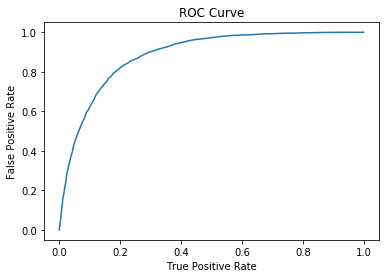

Training set areaUnderROC: 0.884909242115


In [47]:
import matplotlib.pyplot as plt
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

**Precision and recall.**

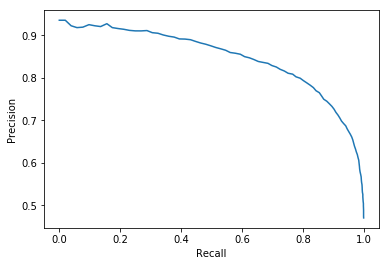

In [48]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Make predictions on the test set.**

In [50]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[1.19871810716723...|       0.0|[0.76829666339830...|
| 40|management|  0.0|[2.20534940465796...|       0.0|[0.90072886169926...|
| 53|management|  0.0|[1.02590348276690...|       0.0|[0.73612093009497...|
| 32|management|  0.0|[1.25795481657702...|       0.0|[0.77867383994058...|
| 54|management|  0.0|[1.33232096924268...|       0.0|[0.79122429116078...|
| 40|management|  0.0|[1.57095096412779...|       0.0|[0.82791913346617...|
| 56|management|  0.0|[3.06095963426752...|       0.0|[0.95525333386804...|
| 50|management|  0.0|[-0.8102603273804...|       1.0|[0.30783502428597...|
| 47|management|  0.0|[0.67024288891379...|       0.0|[0.66155754396054...|
| 44|management|  0.0|[1.29756265761715...|       0.0|[0.78542449653716...|
+---+-------

## Evaluate our Logistic Regression model.

In [51]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

('Test Area Under ROC', 0.8858324614449619)


## Decision Tree Classifier
Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multi-class classification, do not require feature scaling, and are able to capture non-linearities and feature interactions.

In [52]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------+----------+--------------------+
|age|       job|label| rawPrediction|prediction|         probability|
+---+----------+-----+--------------+----------+--------------------+
| 37|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 40|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 53|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 32|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
| 54|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 40|management|  0.0|  [373.0,30.0]|       0.0|[0.92555831265508...|
| 56|management|  0.0| [1333.0,86.0]|       0.0|[0.93939393939393...|
| 50|management|  0.0|[788.0,1230.0]|       1.0|[0.39048562933597...|
| 47|management|  0.0|[788.0,1230.0]|       1.0|[0.39048562933597...|
| 44|management|  0.0|[1130.0,387.0]|       0.0|[0.74489123269611...|
+---+----------+-----+--------------+----------+--------------------+
only showing top 10 

#### Evaluate our Decision Tree model.


In [53]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.780724005007


One simple decision tree performed poorly because it is too weak given the range of different features. The prediction accuracy of decision trees can be improved by Ensemble methods, such as Random Forest and Gradient-Boosted Tree.

### Random Forest Classifier

In [54]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+----------+-----+--------------------+----------+--------------------+
|age|       job|label|       rawPrediction|prediction|         probability|
+---+----------+-----+--------------------+----------+--------------------+
| 37|management|  0.0|[13.7684085682463...|       0.0|[0.68842042841231...|
| 40|management|  0.0|[15.8223745371936...|       0.0|[0.79111872685968...|
| 53|management|  0.0|[13.1702598030275...|       0.0|[0.65851299015137...|
| 32|management|  0.0|[14.1919959887199...|       0.0|[0.70959979943599...|
| 54|management|  0.0|[14.6398539567788...|       0.0|[0.73199269783894...|
| 40|management|  0.0|[14.0699607906075...|       0.0|[0.70349803953037...|
| 56|management|  0.0|[18.2300150701502...|       0.0|[0.91150075350751...|
| 50|management|  0.0|[5.87833809369094...|       1.0|[0.29391690468454...|
| 47|management|  0.0|[9.42210757136227...|       1.0|[0.47110537856811...|
| 44|management|  0.0|[11.9323409071916...|       0.0|[0.59661704535958...|
+---+-------

#### Evaluate our Random Forest Classifier.

In [55]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.882371041465


# Project

## Introduction to the problem

**Problem Satatement**

Using a dataset of collection of SMS, predict whether a piece of text/sms is a Spam or not

**Exploring Dataset**

1. Read the dataset into a Spark Dataframe

In [57]:
# from pyspark.sql import SQLContext
# sqlContext = SQLContext(sc)

# spark = SparkSession \
#     .builder \
#     .appName("Python Spark dataframe basic example") \
#     .getOrCreate()
from pyspark.sql import SparkSession

data = spark.read.csv('data/SMSSpamCollection.csv', header='true')

**Print out the column names**

In [58]:
data.columns

['category', 'text']

**Let's have a look to our Dataframe**

In [60]:
data.show(5)

+--------+--------------------+
|category|                text|
+--------+--------------------+
|     ham|Go until jurong p...|
|     ham|Ok lar... Joking ...|
|    spam|Free entry in 2 a...|
|     ham|U dun say so earl...|
|     ham|Nah I don't think...|
+--------+--------------------+
only showing top 5 rows



**Task 1 - Print out the schema to see datatype of each column**

In [61]:
data.printSchema()

root
 |-- category: string (nullable = true)
 |-- text: string (nullable = true)



**Task 2 - Count number of messages in each catergory present into our dataset**

In [62]:
from pyspark.sql.functions import col

# by top 20 categories
data.groupBy("category") \
    .count() \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|     ham| 4827|
|    spam|  747|
+--------+-----+



**TASK 3 - Next, perform three tasks:**

- Prepare your data i.e. text column by tokenizing the words
- Remove stop words from the tokenized column. You can use nltk `english` collection of stopwords to intializae a set of stopwords. For example: 

```python
from nltk.corpus import stopwords
add_stopwords = stopwords.words('english')
StopWordsRemover(inputCol, outputCol).setStopWords(add_stopwords)
```

- Finally Bag of words i.e. CountVectorizer to get features

Use official documentation guide Spark on MLlib to solve the exercise. Link:

[Spark MLlib guide](http://spark.apache.org/docs/1.6.2/ml-guide.html)


**Hint:**
1.  From `pyspark.ml.feature import RegexTokenizer` and give `text` column as input to it, correspondinly save output in a new column.

2. From `pyspark.ml.feature import StopWordsRemover` and give the tokenized set of words column as an input to it.

3. from pyspark.ml.feature import CountVectorizer and give the stopwords filtered set of column as input to it and output column will be the feature column.

In [63]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from nltk.corpus import stopwords

# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="text", outputCol="words", pattern="\\W")


# stop words
add_stopwords = stopwords.words('english')

stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000)

**Task 4 - Next, Apply StringIndexer to the `category` column to get label indexing**

Hint: Use `from pyspark.ml.feature import StringIndexer` by giving Input column as our target column which is `category` and name the output column as you like,, say `label`


In [101]:
from pyspark.ml.feature import StringIndexer
# String Indexer - A label indexer that maps a string column of labels to an ML column of label indices.

label_stringIdx = StringIndexer(inputCol = "category", outputCol = "label")

**Task 5 - Pipeline All the steps performed above using Spark Pipeline API**

Hint: Use `from pyspark.ml import Pipeline` and give stages as set of operations we want to perform in ordered series. Stages list will look like, stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx].


In [66]:
from pyspark.ml import Pipeline

# A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow.

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)

**Use `show()` to have a look to your transformed dataframe**

In [104]:
dataset.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|category|                text|               words|            filtered|         rawFeatures|            features|label|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|     ham|Go until jurong p...|[go, until, juron...|[go, jurong, poin...|(10000,[165,1150,...|(10000,[165,1150,...|  0.0|
|     ham|Ok lar... Joking ...|[ok, lar, joking,...|[ok, lar, joking,...|(10000,[20,2484,5...|(10000,[20,2484,5...|  0.0|
|    spam|Free entry in 2 a...|[free, entry, in,...|[free, entry, 2, ...|(10000,[253,1073,...|(10000,[253,1073,...|  1.0|
|     ham|U dun say so earl...|[u, dun, say, so,...|[u, dun, say, ear...|(10000,[1535,3722...|(10000,[1535,3722...|  0.0|
|     ham|Nah I don't think...|[nah, i, don, t, ...|[nah, think, goes...|(10000,[1210,1564...|(10000,[1210,1564...|  0.0|
+--------+--------------

**Task 6 - Next, split the dataset into training and test data**

**Also, count the number of rows into each dataset**

In [103]:
### Randomly split data into training and test sets. set seed for reproducibility

(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 3964
Test Dataset Count: 1610


## Logistic Regression using Count Vector Features

**Task 7 - Apply Logisitic Regression using Count Vector Features generated and train the model**

Hint: Use `from pyspark.ml.classification import LogisticRegression` to  build a model by fitting your training data.

In [105]:
# Build the model
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

# Train model with Training Data
lrModel = lr.fit(trainingData)

**Perform prediction using the test dataset**

In [70]:
predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                          text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|The last thing i ever wante...|     ham|[0.993800982052416,0.006199...|  0.0|       0.0|
|He neva grumble but i sad l...|     ham|[0.9909979741380167,0.00900...|  0.0|       0.0|
|Oh... Haha... Den we shld h...|     ham|[0.989072174498803,0.010927...|  0.0|       0.0|
|THING R GOOD THANX GOT EXAM...|     ham|[0.9887591192856042,0.01124...|  0.0|       0.0|
|"And that is the problem. Y...|     ham|[0.988324409355555,0.011675...|  0.0|       0.0|
|Wen ur lovable bcums angry ...|     ham|[0.9882426098634558,0.01175...|  0.0|       0.0|
|No i'm not. I can't give yo...|     ham|[0.9881854921268145,0.01181...|  0.0|       0.0|
|You are always putting your...|     ham|[0.9879443215569211,0.01205...|  0.0|       0.0|
|Heart is 

**Perform evaluations using MulticlassClassificationEvaluator**

Hint: Use MulticlassClassificationEvaluator
`from pyspark.ml.evaluation import MulticlassClassificationEvaluator`

In [71]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.9494949494949494

# Logistic Regression using TF-IDF Features

**Task 8 - Now, Apply Logistic Regression using TF-IDF to see if we can improve the accuracy further**

In [72]:
from pyspark.ml.feature import HashingTF, IDF

# Add HashingTF and IDF to transformation
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms

# Redo Pipeline
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx])

In [73]:
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)

### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)

# Build the model
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

# Train model with Training Data
lrModel = lr.fit(trainingData)

**Perform predictions on Testdata using this model**

In [75]:
predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("text","category","probability","label","prediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+--------+------------------------------+-----+----------+
|                          text|category|                   probability|label|prediction|
+------------------------------+--------+------------------------------+-----+----------+
|THING R GOOD THANX GOT EXAM...|     ham|[0.9894476412953456,0.01055...|  0.0|       0.0|
|He neva grumble but i sad l...|     ham|[0.9887095930738091,0.01129...|  0.0|       0.0|
|Although i told u dat i'm i...|     ham|[0.9877546446366153,0.01224...|  0.0|       0.0|
|Wen ur lovable bcums angry ...|     ham|[0.9873871799731352,0.01261...|  0.0|       0.0|
|"And that is the problem. Y...|     ham|[0.9870440089341924,0.01295...|  0.0|       0.0|
|U say leh... Of course noth...|     ham|[0.9870247728278815,0.01297...|  0.0|       0.0|
|Honeybee Said: *I'm d Sweet...|     ham|[0.9865047862576719,0.01349...|  0.0|       0.0|
|Cos i was out shopping wif ...|     ham|[0.986161453417046,0.013838...|  0.0|       0.0|
|Hi neva w

**Evaluate your model using MulticlassClassificationEvaluator**

In [76]:
# evaluator = MulticlassClassificationEvaluator(predictionCol="")
# evaluator.evaluate(predictions)

## Custom text

**Give a custom message to your trained model and check results. Remember, feed your text in form of dataframe to the model.**

#### Example of how to create a spark dataframe

```python
from pyspark.sql import Row
l = [('Ankit',25),('Jalfaizy',22),('saurabh',20),('Bala',26)]
rdd = sc.parallelize(l)
people = rdd.map(lambda x: Row(name=x[0], age=int(x[1])))
schemaPeople = sqlContext.createDataFrame(people)

print(type(schemaPeople))
#  pyspark.sql.dataframe.DataFrame
```


In [78]:
from pyspark.sql import Row
ll = [('Hurry up! Answer simple questions and WINNER will get $900 prize reward! To claim call us. Valid 12 hours only.'),('Hey, How are you? Long time no see')]
rdds = sc.parallelize(ll)
tx = rdds.map(lambda x: Row(text=x))
schematxt = sqlContext.createDataFrame(tx)

In [79]:
schematxt.show()

+--------------------+
|                text|
+--------------------+
|Hurry up! Answer ...|
|Hey, How are you?...|
+--------------------+



## Calculating features for test sample data

In [80]:
test_new_dataset = pipelineFit.transform(schematxt)
test_new_dataset.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|               words|            filtered|         rawFeatures|            features|
+--------------------+--------------------+--------------------+--------------------+--------------------+
|Hurry up! Answer ...|[hurry, up, answe...|[hurry, answer, s...|(10000,[1,721,727...|(10000,[1,721,727...|
|Hey, How are you?...|[hey, how, are, y...|[hey, long, time,...|(10000,[7515,8157...|(10000,[7515,8157...|
+--------------------+--------------------+--------------------+--------------------+--------------------+



## Predicting on calculated features of test sample data

In [81]:
test_pred = lrModel.transform(test_new_dataset)
# test_pred.filter(test_pred['prediction'] == 0) \
#     .select("text","probability","prediction") \
#     .orderBy("probability", ascending=False)

In [82]:
test_pred.select("text","probability","prediction").show()

+--------------------+--------------------+----------+
|                text|         probability|prediction|
+--------------------+--------------------+----------+
|Hurry up! Answer ...|[0.40530136808716...|       1.0|
|Hey, How are you?...|[0.96833775344934...|       0.0|
+--------------------+--------------------+----------+



## Task 9 - Build Model using Naive Bayes algorithm

### Predict on sample text

In [83]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(smoothing=1)
model = nb.fit(trainingData)
predictions = model.transform(testData)

In [84]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.9731847068395234

### prediction on sample dataset

In [86]:
test_pred.select("text","probability","prediction").show()

+--------------------+--------------------+----------+
|                text|         probability|prediction|
+--------------------+--------------------+----------+
|Hurry up! Answer ...|[0.40530136808716...|       1.0|
|Hey, How are you?...|[0.96833775344934...|       0.0|
+--------------------+--------------------+----------+



As you can see Naive Bayes performed well and it's able to identify message as spam! Congrats!